<h2>GLOBAL POWER PLANT MACHINE LEARNING MODEL TO PREDICT THE PRIMARY FUEL TYPE AND CAPACITY IN MW</h2>

In [1]:
#Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

<p style="font-size:120%;color:purple">We have to combine the datasets from three countries Australia, USA and India to make one single dataset to train our model</p>

In [5]:
#Importing all three datasets

In [6]:
df_AUS = pd.read_csv('database_AUS.csv')
df_AUS

country country_long                                 name   gppd_idnr  \
0       AUS    Australia                     Adelaide Airport  AUS0000433   
1       AUS    Australia                 Adelaide Showgrounds  AUS0000432   
2       AUS    Australia                     Albany Wind Farm  AUS0000065   
3       AUS    Australia                Alice Springs Airport  AUS0000469   
4       AUS    Australia                         Amcor Gawler  AUS0000231   
..      ...          ...                                  ...         ...   
507     AUS    Australia                           Yarrawonga  AUS0000101   
508     AUS    Australia                               Yarwun  AUS0000173   
509     AUS    Australia                             Yuendumu  AUS0000465   
510     AUS    Australia                               Yulara  AUS0000257   
511     AUS    Australia  Yurralyi Maya (Karratha Seven Mile)  AUS0000218   

     capacity_mw  latitude  longitude primary_fuel  other_fuel1  other_fuel2  \
0           0.11  -34.9387   138.5377        Solar          NaN          NaN   
1           1.00  -34.9453   138.5882        Solar          NaN          NaN   
2          21.60  -35.0641   117.7977         Wind          NaN          NaN   
3           0.24  -23.7966   133.8971        Solar          NaN          NaN   
4           4.00  -34.5509   138.7659          Oil          NaN          NaN   
..           ...       ...        ...          ...          ...          ...   
507         9.00  -36.0094   145.9995        Hydro          NaN          NaN   
508       154.00  -23.8306   151.1519          Gas          NaN          NaN   
509         0.24  -22.2426   131.7931        Solar          NaN          NaN   
510        10.95  -25.2323   130.9912          Gas          NaN          NaN   
511       180.00  -20.7620   116.7420          Gas          NaN          NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                 2019.0                  NaN                 NaN   
1    ...                 2019.0                  NaN                 NaN   
2    ...                 2019.0            89.595278          102.642778   
3    ...                 2019.0                  NaN                 NaN   
4    ...                 2019.0                  NaN                 NaN   
..   ...                    ...                  ...                 ...   
507  ...                 2019.0            38.216111           44.224722   
508  ...                 2019.0                  NaN                 NaN   
509  ...                 2019.0                  NaN                 NaN   
510  ...                 2019.0            21.947500           22.775000   
511  ...                 2019.0                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2             96.555556           95.872778           85.900278   
3                   NaN                 NaN                 NaN   
4                   NaN                 NaN                 NaN   
..                  ...                 ...                 ...   
507           50.183889           46.035278           31.444722   
508                 NaN                 NaN                 NaN   
509                 NaN            5.216667            5.176944   
510           24.086111           23.043889           19.885000   
511          977.226944          945.557778          756.219167   

     generation_gwh_2018  generation_gwh_2019  \
0                    NaN                  NaN   
1                    NaN                  NaN   
2              92.682222                  NaN   
3                    NaN                  NaN   
4                    NaN                  NaN   
..                   ...                  ...   
507            37.317778                  NaN   
508     

In [7]:
df_IND = pd.read_csv('database_IND.csv')
df_IND

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0              2.41461          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN              1.92500                 NaN   
904  ...                    NaN              2.05400                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [8]:
df_USA = pd.read_csv('database_USA.csv')
df_USA

country              country_long                            name  \
0         USA  United States of America  10 Briggs Solar NG  LLC (East)   
1         USA  United States of America      100 Brook Hill Drive Solar   
2         USA  United States of America      1001 Ebenezer Church Solar   
3         USA  United States of America             1008 Matthews Solar   
4         USA  United States of America               1009 Yadkin Solar   
...       ...                       ...                             ...   
11874     USA  United States of America        Zotos International WPGF   
11875     USA  United States of America   Zumbro Community Solar Garden   
11876     USA  United States of America             Zumbro Solar Garden   
11877     USA  United States of America                            Zuni   
11878     USA  United States of America             eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1      USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2      USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3      USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4      USA0063445          0.0   36.1475   -80.6561          NaN         NaN   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                2019.0                  NaN   
1             NaN  ...                2019.0                  NaN   
2             NaN  ...                2019.0                  NaN   
3             NaN  ...                2019.0                  NaN   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
11874         NaN  ...                2019.0                3.671   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0                0.000   
11878         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3                     NaN                 NaN                 NaN   
4                     NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11874             2.46015               2.489               1.670   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877             0.00000               0.000                 NaN   
11878            51.27600              71.505              76.392   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN              2.46700   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...              

In [9]:
#We will combine all three datasets into a single one

In [10]:
df = pd.concat([df_AUS, df_IND, df_USA],axis=0)
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar         NaN   
1      AUS0000432         1.00  -34.9453   138.5882        Solar         NaN   
2      AUS0000065        21.60  -35.0641   117.7977         Wind         NaN   
3      AUS0000469         0.24  -23.7966   133.8971        Solar         NaN   
4      AUS0000231         4.00  -34.5509   138.7659          Oil         NaN   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648         3.40   42.8869   -76.9683         Wind         NaN   
11875  USA0061574         1.00   44.3195   -92.6703        Solar         NaN   
11876  USA0063426         0.00   44.0460   -92.7600          NaN         NaN   
11877  USA0000478         0.00   39.7373  -105.0170          NaN         NaN   
11878  USA0059281         9.80   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                2019.0                  NaN   
1             NaN  ...                2019.0                  NaN   
2             NaN  ...                2019.0            89.595278   
3             NaN  ...                2019.0                  NaN   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
11874         NaN  ...                2019.0             3.671000   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0             0.000000   
11878         NaN  ...                2019.0            12.968000   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2              102.642778           96.555556           95.872778   
3                     NaN                 NaN                 NaN   
4                     NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11874            2.460150            2.489000            1.670000   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877            0.000000            0.000000                 NaN   
11878           51.276000           71.505000           76.392000   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2               85.900278            92.682222                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
1

<h3>EXPLORATORY DATA ANALYSIS</h3>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

In [12]:
df.head()

country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0  -34.9387   138.5377        Solar         NaN         NaN  ...   
1  -34.9453   138.5882        Solar         NaN         NaN  ...   
2  -35.0641   117.7977         Wind         NaN         NaN  ...   
3  -23.7966   133.8971        Solar         NaN         NaN  ...   
4  -34.5509   138.7659          Oil         NaN         NaN  ...   

  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                2019.0                  NaN                 NaN   
1                2019.0                  NaN                 NaN   
2                2019.0            89.595278          102.642778   
3                2019.0                  NaN                 NaN   
4                2019.0                  NaN                 NaN   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2           96.555556           95.872778           85.900278   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   generation_gwh_2018  generation_gwh_2019            generation_data_source  \
0                  NaN                  NaN                               NaN   
1                  NaN                  NaN                               NaN   
2            92.682222                  NaN  Australia Clean Energy Regulator   
3                  NaN                  NaN                               NaN   
4                  NaN                  NaN                               NaN   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [13]:
df.iloc[1]

country                                                                   AUS
country_long                                                        Australia
name                                                     Adelaide Showgrounds
gppd_idnr                                                          AUS0000432
capacity_mw                                                               1.0
latitude                                                             -34.9453
longitude                                                            138.5882
primary_fuel                                                            Solar
other_fuel1                                                               NaN
other_fuel2                                                               NaN
other_fuel3                                                               NaN
commissioning_year                                                        NaN
owner                                                    Adelaid

In [14]:
df.tail()

country              country_long                           name  \
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
11874         NaN  ...                2019.0                3.671   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0                0.000   
11878         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
11874             2.46015               2.489               1.670   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877             0.00000               0.000                 NaN   
11878            51.27600              71.505              76.392   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
11874             1.23349                2.630                1.211   
11875                 NaN                1.161                1.589   
11876                 NaN                  NaN                  NaN   
11877                 NaN                  NaN                  NaN   
11878            76.63100               75.228             72.06506   

                       generation_data_source  estimated_generation_gwh  
11874  U.S. Energy Information Administration                       NaN  
11875  U.S. Energy Information Administration                       NaN  
11876                                     NaN                       NaN  
11877  U.S. Energy Information Administration                       NaN  
11878  U.S. Energy Information Administration                       NaN  

[5 rows x 27 columns]

In [15]:
df.iloc[11878]

country                                                              USA
country_long                                    United States of America
name                                       Three Rivers Solar Power  LLC
gppd_idnr                                                     USA0063386
capacity_mw                                                          0.0
latitude                                                         44.7116
longitude                                                         -68.11
primary_fuel                                                         NaN
other_fuel1                                                          NaN
other_fuel2                                                          NaN
other_fuel3                                                          NaN
commissioning_year                                                   NaN
owner                                      Three Rivers Solar Power  LLC
source                            U.S. Energy Infor

In [16]:
#Checking null values

In [17]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

<p style="font-size:120%;color:maroon">There are some columns which are entirely null values present like wepp_id, estimated_generation_gwh and there are some columns where 90 to 95 percent of data is null like other_fuel1, other_fuel2, other_fuel3.</p>

<p style="font-size:120%;color:royalblue">We will drop these columns as they will not have a major say in the target column</p>

In [18]:
df.drop(['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh'], axis=1, inplace=True)

In [19]:
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar   
1      AUS0000432         1.00  -34.9453   138.5882        Solar   
2      AUS0000065        21.60  -35.0641   117.7977         Wind   
3      AUS0000469         0.24  -23.7966   133.8971        Solar   
4      AUS0000231         4.00  -34.5509   138.7659          Oil   
...           ...          ...       ...        ...          ...   
11874  USA0057648         3.40   42.8869   -76.9683         Wind   
11875  USA0061574         1.00   44.3195   -92.6703        Solar   
11876  USA0063426         0.00   44.0460   -92.7600          NaN   
11877  USA0000478         0.00   39.7373  -105.0170          NaN   
11878  USA0059281         9.80   40.5606  -112.0478          Gas   

       commissioning_year                          owner  ...  \
0              2011.00000           Adelaide Airport Ltd  ...   
1                     NaN           Adelaide Showgrounds  ...   
2                     NaN                   Verve Energy  ...   
3              2004.00000          Alice Springs Airport  ...   
4              2015.00000                Energy Response  ...   
...                   ...                            ...  ...   
11874          2012.00000            Zotos International  ...   
11875          2018.00000               Zumbro Solar LLC  ...   
11876                 NaN              Zumbro Garden LLC  ...   
11877                 NaN  Public Service Co of Colorado  ...   
11878          2013.77551                   Bloom Energy  ...   

                                      geolocation_source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

      year_of_capacity_data generation_gwh_2013  generation_gwh_2014  \
0                    2019.0                 NaN                  NaN   
1                    2019.0                 NaN                  NaN   
2                    2019.0           89.595278           102.642778   
3                    2019.0                 NaN                  NaN   
4                    2019.0                 NaN                  NaN   
...                     ...                 ...                  ...   
11874                2019.0            3.671000             2.460150   
11875                2019.0                 NaN                  NaN   
11876                2019.0                 NaN                  NaN   
11877                2019.0            0.000000             0.000000   
11878 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   country_long            13298 non-null  object 
 2   name                    13298 non-null  object 
 3   gppd_idnr               13298 non-null  object 
 4   capacity_mw             13292 non-null  float64
 5   latitude                13220 non-null  float64
 6   longitude               13220 non-null  float64
 7   primary_fuel            11294 non-null  object 
 8   commissioning_year      10654 non-null  float64
 9   owner                   12705 non-null  object 
 10  source                  13298 non-null  object 
 11  url                     13298 non-null  object 
 12  geolocation_source      13275 non-null  object 
 13  year_of_capacity_data   12860 non-null  float64
 14  generation_gwh_2013     7170 non-null   flo

In [21]:
#The country short and long are the same we will drop short name and keep the long name

In [22]:
df.drop('country', axis=1, inplace=True)
df

country_long                           name   gppd_idnr  \
0                     Australia               Adelaide Airport  AUS0000433   
1                     Australia           Adelaide Showgrounds  AUS0000432   
2                     Australia               Albany Wind Farm  AUS0000065   
3                     Australia          Alice Springs Airport  AUS0000469   
4                     Australia                   Amcor Gawler  AUS0000231   
...                         ...                            ...         ...   
11874  United States of America       Zotos International WPGF  USA0057648   
11875  United States of America  Zumbro Community Solar Garden  USA0061574   
11876  United States of America            Zumbro Solar Garden  USA0063426   
11877  United States of America                           Zuni  USA0000478   
11878  United States of America            eBay - South Jordan  USA0059281   

       capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0             0.11  -34.9387   138.5377        Solar          2011.00000   
1             1.00  -34.9453   138.5882        Solar                 NaN   
2            21.60  -35.0641   117.7977         Wind                 NaN   
3             0.24  -23.7966   133.8971        Solar          2004.00000   
4             4.00  -34.5509   138.7659          Oil          2015.00000   
...            ...       ...        ...          ...                 ...   
11874         3.40   42.8869   -76.9683         Wind          2012.00000   
11875         1.00   44.3195   -92.6703        Solar          2018.00000   
11876         0.00   44.0460   -92.7600          NaN                 NaN   
11877         0.00   39.7373  -105.0170          NaN                 NaN   
11878         9.80   40.5606  -112.0478          Gas          2013.77551   

                               owner  \
0               Adelaide Airport Ltd   
1               Adelaide Showgrounds   
2                       Verve Energy   
3              Alice Springs Airport   
4                    Energy Response   
...                              ...   
11874            Zotos International   
11875               Zumbro Solar LLC   
11876              Zumbro Garden LLC   
11877  Public Service Co of Colorado   
11878                   Bloom Energy   

                                                  source  ...  \
0      Australian Renewable Energy Mapping Infrastruc...  ...   
1      Australian Renewable Energy Mapping Infrastruc...  ...   
2      Australian Renewable Energy Mapping Infrastruc...  ...   
3      Australian Renewable Energy Mapping Infrastruc...  ...   
4      Australian Renewable Energy Mapping Infrastruc...  ...   
...                                                  ...  ...   
11874             U.S. Energy Information Administration  ...   
11875             U.S. Energy Information Administration  ...   
11876             U.S. Energy Information Administration  ...   
11877             U.S. Energy Information Administration  ...   
11878             U.S. Energy Information Administration  ...   

                                      geolocation_source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

      year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                    2019.0                  NaN                  NaN   
1                    2019.0             

<h2>DATA VISUALIZATION</h2>

<Axes: xlabel='country_long', ylabel='count'>

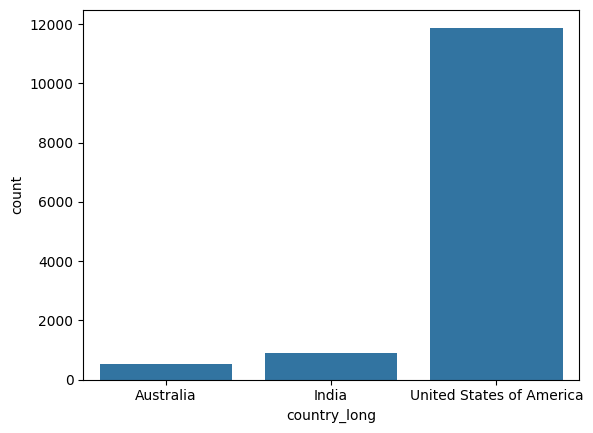

In [23]:
sns.countplot(data=df, x='country_long')

In [24]:
df['gppd_idnr'].value_counts()

gppd_idnr
AUS0000433    1
USA0062255    1
USA0006180    1
USA0057489    1
USA0061333    1
             ..
USA0006378    1
USA0000840    1
USA0050818    1
USA0062324    1
USA0059281    1
Name: count, Length: 13298, dtype: int64

In [25]:
df['gppd_idnr'].unique()

array(['AUS0000433', 'AUS0000432', 'AUS0000065', ..., 'USA0063426',
       'USA0000478', 'USA0059281'], dtype=object)

In [26]:
df['gppd_idnr'].nunique()

13298

In [27]:
df['name'].value_counts()

name
Richland                      3
Central Utility Plant         2
Gladstone                     2
Franklin Solar                2
Hunter                        2
                             ..
E F Barrett                   1
E F Oxnard Energy Facility    1
E J West                      1
E Nash PV1                    1
eBay - South Jordan           1
Name: count, Length: 13266, dtype: int64

In [28]:
df['name'].nunique()

13266

In [29]:
#We will drop name and gppd_idnr because it is unique

In [30]:
df.drop(['name', 'gppd_idnr'], axis=1, inplace=True)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year                          owner  \
0            Solar          2011.00000           Adelaide Airport Ltd   
1            Solar                 NaN           Adelaide Showgrounds   
2             Wind                 NaN                   Verve Energy   
3            Solar          2004.00000          Alice Springs Airport   
4              Oil          2015.00000                Energy Response   
...            ...                 ...                            ...   
11874         Wind          2012.00000            Zotos International   
11875        Solar          2018.00000               Zumbro Solar LLC   
11876          NaN                 NaN              Zumbro Garden LLC   
11877          NaN                 NaN  Public Service Co of Colorado   
11878          Gas          2013.77551                   Bloom Energy   

                                                  source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

                                                url  \
0                   https://www.nationalmap.gov.au/   
1                   https://www.nationalmap.gov.au/   
2                   https://www.nationalmap.gov.au/   
3                   https://www.nationalmap.gov.au/   
4                   https://www.nationalmap.gov.au/   
...                                             ...   
11874  http://www.eia.gov/electricity/data/browser/   
11875  http://www.eia.gov/electricity/data/browser/   
11876  http://www.eia.gov/electricity/data/browser/   
11877  http://www.eia.gov/electricity/data/browser/   
11878  http://www.eia.gov/electricity/data/browser/   

                                      geolocation_source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0                  NaN                  NaN   
1                     2019.0                  NaN             

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            13298 non-null  object 
 1   capacity_mw             13292 non-null  float64
 2   latitude                13220 non-null  float64
 3   longitude               13220 non-null  float64
 4   primary_fuel            11294 non-null  object 
 5   commissioning_year      10654 non-null  float64
 6   owner                   12705 non-null  object 
 7   source                  13298 non-null  object 
 8   url                     13298 non-null  object 
 9   geolocation_source      13275 non-null  object 
 10  year_of_capacity_data   12860 non-null  float64
 11  generation_gwh_2013     7170 non-null   float64
 12  generation_gwh_2014     7534 non-null   float64
 13  generation_gwh_2015     7993 non-null   float64
 14  generation_gwh_2016     8701 non-null   flo

In [32]:
df.describe()

capacity_mw      latitude     longitude  commissioning_year  \
count  13292.000000  13220.000000  13220.000000        10654.000000   
mean     117.738717     35.053213    -73.794217         1998.184904   
std      347.169038     15.444195     62.868834           24.017781   
min        0.000000    -42.888300   -171.712400         1896.000000   
25%        1.500000     33.901700   -104.659875         1988.000000   
50%        5.500000     38.389750    -87.346000         2008.000000   
75%       52.725000     42.175125    -75.475925         2015.000000   
max     6809.000000    425.246100    153.434100         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count                12860.0          7170.000000          7534.000000   
mean                  2019.0           563.383222           635.739731   
std                      0.0          2030.523760          2193.172655   
min                   2019.0          -947.600000          -989.619000   
25%                   2019.0             1.653075             2.018000   
50%                   2019.0            21.384500            22.241000   
75%                   2019.0           185.326498           217.069500   
max                   2019.0         31431.080000         32320.917000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count          7993.000000          8701.000000          9292.000000   
mean            616.801877           561.784508           532.472482   
std            2148.167470          2050.411295          2001.411908   
min            -864.428000          -768.620000          -934.944000   
25%               2.140000             2.108000             2.063750   
50%              19.504000            15.410278            13.433861   
75%             200.279000           173.348004           157.889688   
max           32525.595000         32377.477000         35116.000000   

       generation_gwh_2018  
count          9858.000000  
mean            513.679016  
std            1963.485305  
min            -982.622000  
25%               2.141250  
50%              12.308500  
75%             149.141249  
max           35136.000000

In [33]:
df['generation_data_source'].value_counts()

generation_data_source
U.S. Energy Information Administration    10069
Central Electricity Authority               454
Australia Clean Energy Regulator            312
Name: count, dtype: int64

In [34]:
df['generation_data_source'].nunique()

3

In [35]:
#Basically the data is given by the respective countries Energy Authority.

In [36]:
df['owner'].value_counts()

owner
Cypress Creek Renewables                198
Sustainable Power Group  LLC             99
Pacific Gas & Electric Co.               90
Southern California Edison Co            86
Consolidated Edison Development Inc.     79
                                       ... 
Exxon Mobil Corp                          1
Pure Hedge LLC                            1
LaPorte Power  LLC                        1
Evonik Degussa Corporation                1
Zumbro Garden LLC                         1
Name: count, Length: 5877, dtype: int64

In [37]:
df['owner'].nunique()

5877

In [38]:
#We will drop this column

In [39]:
df.drop('owner', axis=1, inplace=True)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  \
0            Solar          2011.00000   
1            Solar                 NaN   
2             Wind                 NaN   
3            Solar          2004.00000   
4              Oil          2015.00000   
...            ...                 ...   
11874         Wind          2012.00000   
11875        Solar          2018.00000   
11876          NaN                 NaN   
11877          NaN                 NaN   
11878          Gas          2013.77551   

                                                  source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

                                                url  \
0                   https://www.nationalmap.gov.au/   
1                   https://www.nationalmap.gov.au/   
2                   https://www.nationalmap.gov.au/   
3                   https://www.nationalmap.gov.au/   
4                   https://www.nationalmap.gov.au/   
...                                             ...   
11874  http://www.eia.gov/electricity/data/browser/   
11875  http://www.eia.gov/electricity/data/browser/   
11876  http://www.eia.gov/electricity/data/browser/   
11877  http://www.eia.gov/electricity/data/browser/   
11878  http://www.eia.gov/electricity/data/browser/   

                                      geolocation_source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0                  NaN                  NaN   
1                     2019.0                  NaN                  NaN   
2                     2019.0            89.595278           102.642778   
3                     2019.0                  NaN                  NaN   
4                     2019.0                  NaN                  NaN   
...                      ...                  ...                  ...   
11874                 2019.0             3.671000             2.

In [40]:
df['url'].value_counts()

url
http://www.eia.gov/electricity/data/browser/                                                                                                                    11833
http://www.cea.nic.in/                                                                                                                                            519
https://www.nationalmap.gov.au/                                                                                                                                   512
http://energia.pr.gov/datos/plantas/                                                                                                                               16
http://www.guampowerauthority.com/gpa_authority/generation/gpa_generation_mix.php                                                                                  10
                                                                                                                                                                ...  


In [41]:
df['url'].nunique()

325

In [42]:
#URLS ARE OF NO USE IN THIS MODEL. DROP THEM

In [43]:
df.drop('url', axis=1, inplace=True)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  \
0            Solar          2011.00000   
1            Solar                 NaN   
2             Wind                 NaN   
3            Solar          2004.00000   
4              Oil          2015.00000   
...            ...                 ...   
11874         Wind          2012.00000   
11875        Solar          2018.00000   
11876          NaN                 NaN   
11877          NaN                 NaN   
11878          Gas          2013.77551   

                                                  source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

                                      geolocation_source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0                  NaN                  NaN   
1                     2019.0                  NaN                  NaN   
2                     2019.0            89.595278           102.642778   
3                     2019.0                  NaN                  NaN   
4                     2019.0                  NaN                  NaN   
...                      ...                  ...                  ...   
11874                 2019.0             3.671000             2.460150   
11875                 2019.0                  NaN                  NaN   
11876                 2019.0                  NaN                  NaN   
11877                 2019.0             0.000000             0.000000   
11878                 2019.0            12.968000            51.276000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                96.555556            95.872778            85.900278   
3                      NaN                  NaN                  N

In [44]:
df['source'].value_counts()

source
U.S. Energy Information Administration                11833
Central Electricity Authority                           519
Australian Renewable Energy Mapping Infrastructure      512
CDM                                                     124
CEPR                                                     14
                                                      ...  
Kjs Ahluwalia group                                       1
Ym Ssk ltd                                                1
Maral Overseas ltd                                        1
Gm Energy ltd                                             1
Windmar Renewable Energy                                  1
Name: count, Length: 206, dtype: int64

In [45]:
df['source'].unique()

array(['Australian Renewable Energy Mapping Infrastructure',
       'National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Mani

In [46]:
df['source'].nunique()

206

<p style="font-size:120%;color:lightblue">Basically generation data source is sufficient than source and it will not be a good model is we train our model on 206 unique values which are categorical</p>

In [47]:
df.drop('source', axis=1, inplace=True)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  \
0            Solar          2011.00000   
1            Solar                 NaN   
2             Wind                 NaN   
3            Solar          2004.00000   
4              Oil          2015.00000   
...            ...                 ...   
11874         Wind          2012.00000   
11875        Solar          2018.00000   
11876          NaN                 NaN   
11877          NaN                 NaN   
11878          Gas          2013.77551   

                                      geolocation_source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0                  NaN                  NaN   
1                     2019.0                  NaN                  NaN   
2                     2019.0            89.595278           102.642778   
3                     2019.0                  NaN                  NaN   
4                     2019.0                  NaN                  NaN   
...                      ...                  ...                  ...   
11874                 2019.0             3.671000             2.460150   
11875                 2019.0                  NaN                  NaN   
11876                 2019.0                  NaN                  NaN   
11877                 2019.0             0.000000             0.000000   
11878                 2019.0            12.968000            51.276000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                96.555556            95.872778            85.900278   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
11874             2.489000             1.670000             1.233490   
11875                  NaN                  NaN                  NaN   
11876                  NaN                  NaN                  NaN   
11877             0.000000                  NaN                  NaN   
11878            71.505000            76.392000            76.631000   

       generation_gwh_2018 generation_gwh_2019  \
0                      NaN                 NaN   
1                      NaN                 NaN   
2                92.682222                 NaN   
3         

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            13298 non-null  object 
 1   capacity_mw             13292 non-null  float64
 2   latitude                13220 non-null  float64
 3   longitude               13220 non-null  float64
 4   primary_fuel            11294 non-null  object 
 5   commissioning_year      10654 non-null  float64
 6   geolocation_source      13275 non-null  object 
 7   year_of_capacity_data   12860 non-null  float64
 8   generation_gwh_2013     7170 non-null   float64
 9   generation_gwh_2014     7534 non-null   float64
 10  generation_gwh_2015     7993 non-null   float64
 11  generation_gwh_2016     8701 non-null   float64
 12  generation_gwh_2017     9292 non-null   float64
 13  generation_gwh_2018     9858 non-null   float64
 14  generation_gwh_2019     9778 non-null   obj

In [49]:
df.isnull().sum()

country_long                 0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel              2004
commissioning_year        2644
geolocation_source          23
year_of_capacity_data      438
generation_gwh_2013       6128
generation_gwh_2014       5764
generation_gwh_2015       5305
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

<Axes: xlabel='count', ylabel='primary_fuel'>

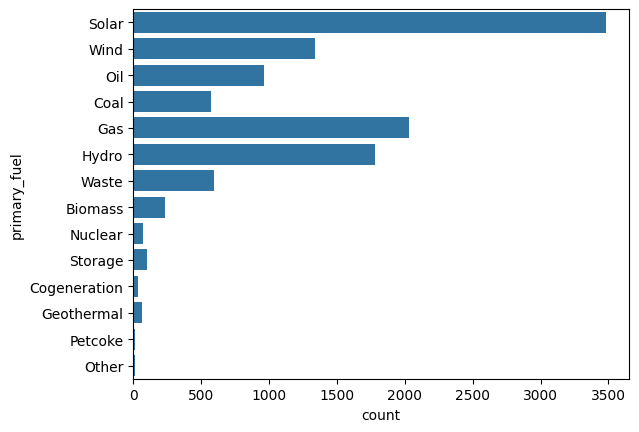

In [50]:
sns.countplot(data=df[df['primary_fuel']!=np.nan]['primary_fuel'])

In [51]:
#Solar is the most common primary fuel produced by companies

<Axes: ylabel='Frequency'>

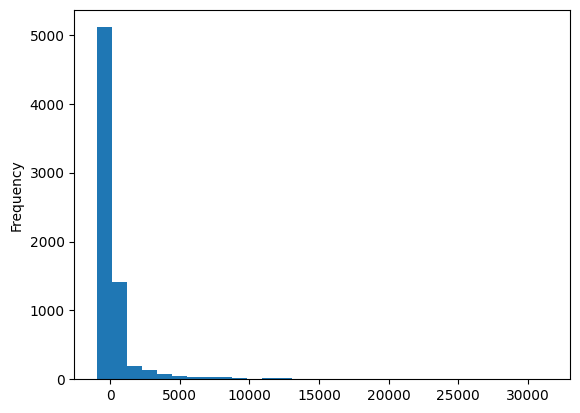

In [52]:
df['generation_gwh_2013'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

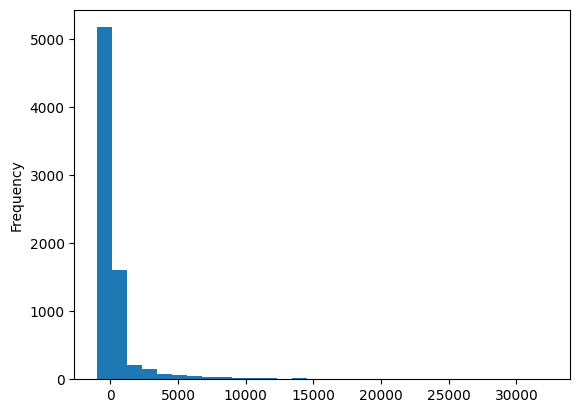

In [53]:
df['generation_gwh_2014'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

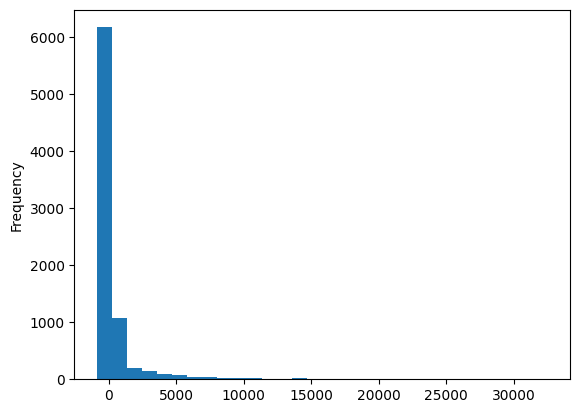

In [54]:
df['generation_gwh_2015'].plot.hist(bins=30)

In [55]:
df['commissioning_year'].value_counts()

commissioning_year
2017.000000    691
2019.000000    598
2018.000000    596
2016.000000    569
2015.000000    466
              ... 
1984.319444      1
2006.435897      1
1974.465556      1
2000.684211      1
2013.775510      1
Name: count, Length: 1936, dtype: int64

<Axes: ylabel='Frequency'>

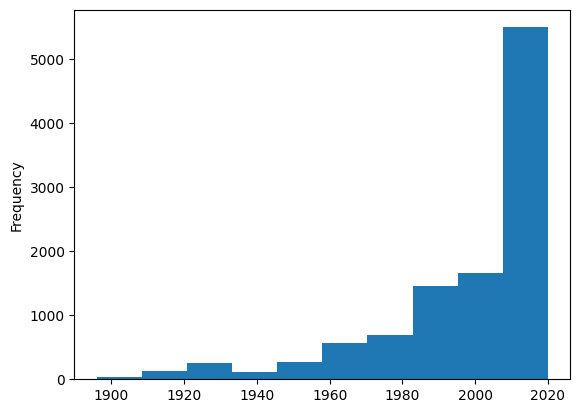

In [56]:
df['commissioning_year'].plot.hist()

In [57]:
#Most of the plants have been comminsioned after 1980

<p style="font-size:120%;color:purple">We will replace nan values in primary fuel column with other category</p>

In [58]:
df['primary_fuel'] = df['primary_fuel'].replace(np.nan, 'Other')
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  \
0            Solar          2011.00000   
1            Solar                 NaN   
2             Wind                 NaN   
3            Solar          2004.00000   
4              Oil          2015.00000   
...            ...                 ...   
11874         Wind          2012.00000   
11875        Solar          2018.00000   
11876        Other                 NaN   
11877        Other                 NaN   
11878          Gas          2013.77551   

                                      geolocation_source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0                  NaN                  NaN   
1                     2019.0                  NaN                  NaN   
2                     2019.0            89.595278           102.642778   
3                     2019.0                  NaN                  NaN   
4                     2019.0                  NaN                  NaN   
...                      ...                  ...                  ...   
11874                 2019.0             3.671000             2.460150   
11875                 2019.0                  NaN                  NaN   
11876                 2019.0                  NaN                  NaN   
11877                 2019.0             0.000000             0.000000   
11878                 2019.0            12.968000            51.276000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                96.555556            95.872778            85.900278   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
11874             2.489000             1.670000             1.233490   
11875                  NaN                  NaN                  NaN   
11876                  NaN                  NaN                  NaN   
11877             0.000000                  NaN                  NaN   
11878            71.505000            76.392000            76.631000   

       generation_gwh_2018 generation_gwh_2019  \
0                      NaN                 NaN   
1                      NaN                 NaN   
2                92.682222                 NaN   
3         

<Axes: xlabel='count', ylabel='primary_fuel'>

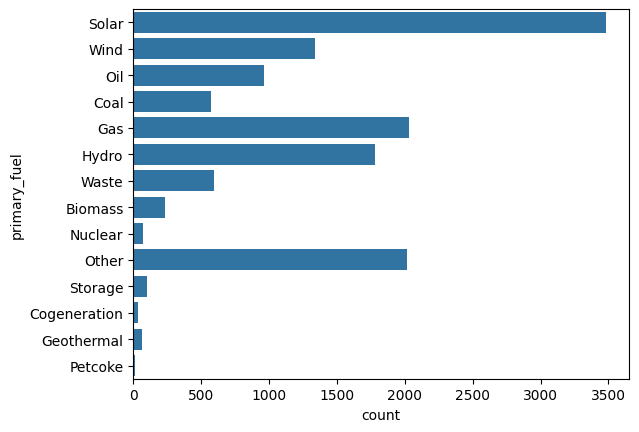

In [59]:
sns.countplot(data=df, y='primary_fuel')

In [60]:
df['capacity_mw'].nunique()

2304

In [61]:
df.isnull().sum()

country_long                 0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel                 0
commissioning_year        2644
geolocation_source          23
year_of_capacity_data      438
generation_gwh_2013       6128
generation_gwh_2014       5764
generation_gwh_2015       5305
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

In [62]:
df['capacity_mw'] = df['capacity_mw'].replace(np.nan, 0.0)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  \
0            Solar          2011.00000   
1            Solar                 NaN   
2             Wind                 NaN   
3            Solar          2004.00000   
4              Oil          2015.00000   
...            ...                 ...   
11874         Wind          2012.00000   
11875        Solar          2018.00000   
11876        Other                 NaN   
11877        Other                 NaN   
11878          Gas          2013.77551   

                                      geolocation_source  \
0      Australian Renewable Energy Mapping Infrastruc...   
1      Australian Renewable Energy Mapping Infrastruc...   
2      Australian Renewable Energy Mapping Infrastruc...   
3      Australian Renewable Energy Mapping Infrastruc...   
4      Australian Renewable Energy Mapping Infrastruc...   
...                                                  ...   
11874             U.S. Energy Information Administration   
11875             U.S. Energy Information Administration   
11876             U.S. Energy Information Administration   
11877             U.S. Energy Information Administration   
11878             U.S. Energy Information Administration   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0                  NaN                  NaN   
1                     2019.0                  NaN                  NaN   
2                     2019.0            89.595278           102.642778   
3                     2019.0                  NaN                  NaN   
4                     2019.0                  NaN                  NaN   
...                      ...                  ...                  ...   
11874                 2019.0             3.671000             2.460150   
11875                 2019.0                  NaN                  NaN   
11876                 2019.0                  NaN                  NaN   
11877                 2019.0             0.000000             0.000000   
11878                 2019.0            12.968000            51.276000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                96.555556            95.872778            85.900278   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
11874             2.489000             1.670000             1.233490   
11875                  NaN                  NaN                  NaN   
11876                  NaN                  NaN                  NaN   
11877             0.000000                  NaN                  NaN   
11878            71.505000            76.392000            76.631000   

       generation_gwh_2018 generation_gwh_2019  \
0                      NaN                 NaN   
1                      NaN                 NaN   
2                92.682222                 NaN   
3         

In [63]:
df.isnull().sum()

country_long                 0
capacity_mw                  0
latitude                    78
longitude                   78
primary_fuel                 0
commissioning_year        2644
geolocation_source          23
year_of_capacity_data      438
generation_gwh_2013       6128
generation_gwh_2014       5764
generation_gwh_2015       5305
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

In [64]:
df['geolocation_source'].value_counts()

geolocation_source
U.S. Energy Information Administration                11833
WRI                                                     807
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
National Renewable Energy Laboratory                      4
Name: count, dtype: int64

In [65]:
df.drop('geolocation_source', axis=1, inplace=True)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  year_of_capacity_data  \
0            Solar          2011.00000                 2019.0   
1            Solar                 NaN                 2019.0   
2             Wind                 NaN                 2019.0   
3            Solar          2004.00000                 2019.0   
4              Oil          2015.00000                 2019.0   
...            ...                 ...                    ...   
11874         Wind          2012.00000                 2019.0   
11875        Solar          2018.00000                 2019.0   
11876        Other                 NaN                 2019.0   
11877        Other                 NaN                 2019.0   
11878          Gas          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                89.595278           102.642778            96.555556   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875                  NaN                  NaN                  NaN   
11876                  NaN                  NaN                  NaN   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                95.872778            85.900278            92.682222   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875                  NaN                  NaN             1.161000   
11876                  NaN                  NaN                  NaN   
11877                  NaN                  NaN                  NaN   
11878            76.392000            76.631000            75.228000   

      generation_gwh_2019                  generation_data_source  
0                     NaN                                     NaN  
1                     NaN                                     NaN  
2                     NaN        Australia Clean Energy Regulator  
3                     NaN                                     NaN  
4                     NaN                                     NaN  
...                   ...                                     ...  
11874               1.211  U.S. Energy Information Administration  
11875               1.589  U.S. Energy Information Administration  
11876                 NaN                                     NaN  

In [66]:
for x in df.iloc[:,6:14]:
    df[x] = df[x].replace(np.nan, 0.0)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  year_of_capacity_data  \
0            Solar          2011.00000                 2019.0   
1            Solar                 NaN                 2019.0   
2             Wind                 NaN                 2019.0   
3            Solar          2004.00000                 2019.0   
4              Oil          2015.00000                 2019.0   
...            ...                 ...                    ...   
11874         Wind          2012.00000                 2019.0   
11875        Solar          2018.00000                 2019.0   
11876        Other                 NaN                 2019.0   
11877        Other                 NaN                 2019.0   
11878          Gas          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                89.595278           102.642778            96.555556   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                95.872778            85.900278            92.682222   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875             0.000000             0.000000             1.161000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            76.392000            76.631000            75.228000   

      generation_gwh_2019                  generation_data_source  
0                     0.0                                     NaN  
1                     0.0                                     NaN  
2                     0.0        Australia Clean Energy Regulator  
3                     0.0                                     NaN  
4                     0.0                                     NaN  
...                   ...                                     ...  
11874               1.211  U.S. Energy Information Administration  
11875               1.589  U.S. Energy Information Administration  
11876                 0.0                                     NaN  

In [67]:
df['commissioning_year'] = df['commissioning_year'].replace(np.nan, 0)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  year_of_capacity_data  \
0            Solar          2011.00000                 2019.0   
1            Solar             0.00000                 2019.0   
2             Wind             0.00000                 2019.0   
3            Solar          2004.00000                 2019.0   
4              Oil          2015.00000                 2019.0   
...            ...                 ...                    ...   
11874         Wind          2012.00000                 2019.0   
11875        Solar          2018.00000                 2019.0   
11876        Other             0.00000                 2019.0   
11877        Other             0.00000                 2019.0   
11878          Gas          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                89.595278           102.642778            96.555556   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                95.872778            85.900278            92.682222   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875             0.000000             0.000000             1.161000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            76.392000            76.631000            75.228000   

      generation_gwh_2019                  generation_data_source  
0                     0.0                                     NaN  
1                     0.0                                     NaN  
2                     0.0        Australia Clean Energy Regulator  
3                     0.0                                     NaN  
4                     0.0                                     NaN  
...                   ...                                     ...  
11874               1.211  U.S. Energy Information Administration  
11875               1.589  U.S. Energy Information Administration  
11876                 0.0                                     NaN  

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            13298 non-null  object 
 1   capacity_mw             13298 non-null  float64
 2   latitude                13220 non-null  float64
 3   longitude               13220 non-null  float64
 4   primary_fuel            13298 non-null  object 
 5   commissioning_year      13298 non-null  float64
 6   year_of_capacity_data   13298 non-null  float64
 7   generation_gwh_2013     13298 non-null  float64
 8   generation_gwh_2014     13298 non-null  float64
 9   generation_gwh_2015     13298 non-null  float64
 10  generation_gwh_2016     13298 non-null  float64
 11  generation_gwh_2017     13298 non-null  float64
 12  generation_gwh_2018     13298 non-null  float64
 13  generation_gwh_2019     13298 non-null  object 
 14  generation_data_source  10835 non-null  obj

In [69]:
df['latitude'] = df['latitude'].replace(np.nan, 0.0)
df['longitude'] = df['longitude'].replace(np.nan, 0.0)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  year_of_capacity_data  \
0            Solar          2011.00000                 2019.0   
1            Solar             0.00000                 2019.0   
2             Wind             0.00000                 2019.0   
3            Solar          2004.00000                 2019.0   
4              Oil          2015.00000                 2019.0   
...            ...                 ...                    ...   
11874         Wind          2012.00000                 2019.0   
11875        Solar          2018.00000                 2019.0   
11876        Other             0.00000                 2019.0   
11877        Other             0.00000                 2019.0   
11878          Gas          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                89.595278           102.642778            96.555556   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                95.872778            85.900278            92.682222   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875             0.000000             0.000000             1.161000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            76.392000            76.631000            75.228000   

      generation_gwh_2019                  generation_data_source  
0                     0.0                                     NaN  
1                     0.0                                     NaN  
2                     0.0        Australia Clean Energy Regulator  
3                     0.0                                     NaN  
4                     0.0                                     NaN  
...                   ...                                     ...  
11874               1.211  U.S. Energy Information Administration  
11875               1.589  U.S. Energy Information Administration  
11876                 0.0                                     NaN  

In [70]:
df.isnull().sum()

country_long                 0
capacity_mw                  0
latitude                     0
longitude                    0
primary_fuel                 0
commissioning_year           0
year_of_capacity_data        0
generation_gwh_2013          0
generation_gwh_2014          0
generation_gwh_2015          0
generation_gwh_2016          0
generation_gwh_2017          0
generation_gwh_2018          0
generation_gwh_2019          0
generation_data_source    2463
dtype: int64

<p style="font-size:120%;color:#FF69B4">We have filled almost all null values with 0 as we cannot fill some column with mean, median values</p>

In [71]:
df['generation_data_source'] = df['generation_data_source'].replace(np.nan, 'Other')
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  year_of_capacity_data  \
0            Solar          2011.00000                 2019.0   
1            Solar             0.00000                 2019.0   
2             Wind             0.00000                 2019.0   
3            Solar          2004.00000                 2019.0   
4              Oil          2015.00000                 2019.0   
...            ...                 ...                    ...   
11874         Wind          2012.00000                 2019.0   
11875        Solar          2018.00000                 2019.0   
11876        Other             0.00000                 2019.0   
11877        Other             0.00000                 2019.0   
11878          Gas          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                89.595278           102.642778            96.555556   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                95.872778            85.900278            92.682222   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875             0.000000             0.000000             1.161000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            76.392000            76.631000            75.228000   

      generation_gwh_2019                  generation_data_source  
0                     0.0                                   Other  
1                     0.0                                   Other  
2                     0.0        Australia Clean Energy Regulator  
3                     0.0                                   Other  
4                     0.0                                   Other  
...                   ...                                     ...  
11874               1.211  U.S. Energy Information Administration  
11875               1.589  U.S. Energy Information Administration  
11876                 0.0                                   Other  

In [72]:
#We can see that we have filled all null values our dataset is done 

In [73]:
#DATA VISUALIZATION

<Axes: xlabel='capacity_mw', ylabel='Count'>

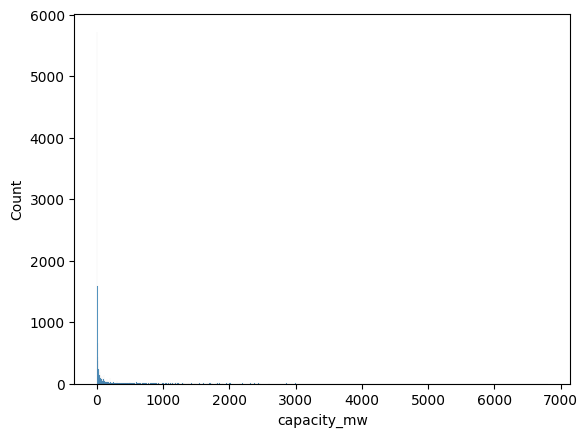

In [74]:
sns.histplot(data=df, x='capacity_mw')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            13298 non-null  object 
 1   capacity_mw             13298 non-null  float64
 2   latitude                13298 non-null  float64
 3   longitude               13298 non-null  float64
 4   primary_fuel            13298 non-null  object 
 5   commissioning_year      13298 non-null  float64
 6   year_of_capacity_data   13298 non-null  float64
 7   generation_gwh_2013     13298 non-null  float64
 8   generation_gwh_2014     13298 non-null  float64
 9   generation_gwh_2015     13298 non-null  float64
 10  generation_gwh_2016     13298 non-null  float64
 11  generation_gwh_2017     13298 non-null  float64
 12  generation_gwh_2018     13298 non-null  float64
 13  generation_gwh_2019     13298 non-null  object 
 14  generation_data_source  13298 non-null  obj

In [76]:
df['generation_gwh_2019'].unique()

array([0.0, 'Central Electricity Authority', 2.467, ..., 1.211, 1.589,
       72.06506], dtype=object)

In [77]:
df['generation_gwh_2019'] = df['generation_gwh_2019'].replace('Central Electricity Authority', 0.0)
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  year_of_capacity_data  \
0            Solar          2011.00000                 2019.0   
1            Solar             0.00000                 2019.0   
2             Wind             0.00000                 2019.0   
3            Solar          2004.00000                 2019.0   
4              Oil          2015.00000                 2019.0   
...            ...                 ...                    ...   
11874         Wind          2012.00000                 2019.0   
11875        Solar          2018.00000                 2019.0   
11876        Other             0.00000                 2019.0   
11877        Other             0.00000                 2019.0   
11878          Gas          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                89.595278           102.642778            96.555556   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                95.872778            85.900278            92.682222   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875             0.000000             0.000000             1.161000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            76.392000            76.631000            75.228000   

       generation_gwh_2019                  generation_data_source  
0                  0.00000                                   Other  
1                  0.00000                                   Other  
2                  0.00000        Australia Clean Energy Regulator  
3                  0.00000                                   Other  
4                  0.00000                                   Other  
...                    ...                                     ...  
11874              1.21100  U.S. Energy Information Administration  
11875              1.58900  U.S. Energy Information Administration  
11876              0.00000                                

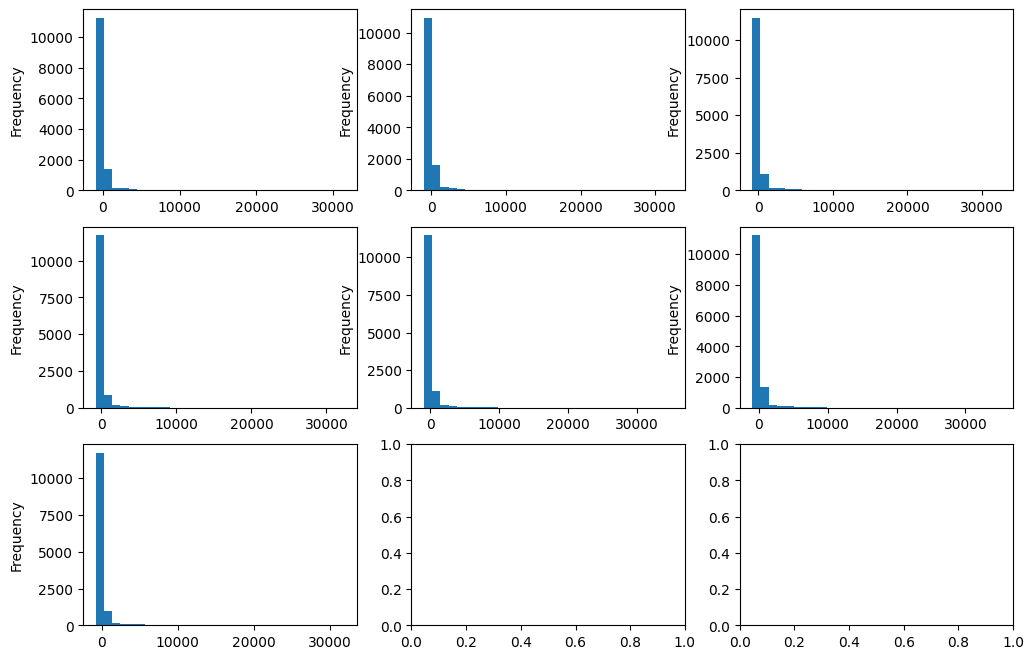

In [78]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12,8))
plotnumber = 1
for x in 'generation_gwh_2013',	'generation_gwh_2014','generation_gwh_2015',	'generation_gwh_2016'	,'generation_gwh_2017'	,'generation_gwh_2018'	,'generation_gwh_2019':
    ax = plt.subplot(3,3, plotnumber)
    df[x].plot.hist(bins=30)
    plotnumber += 1


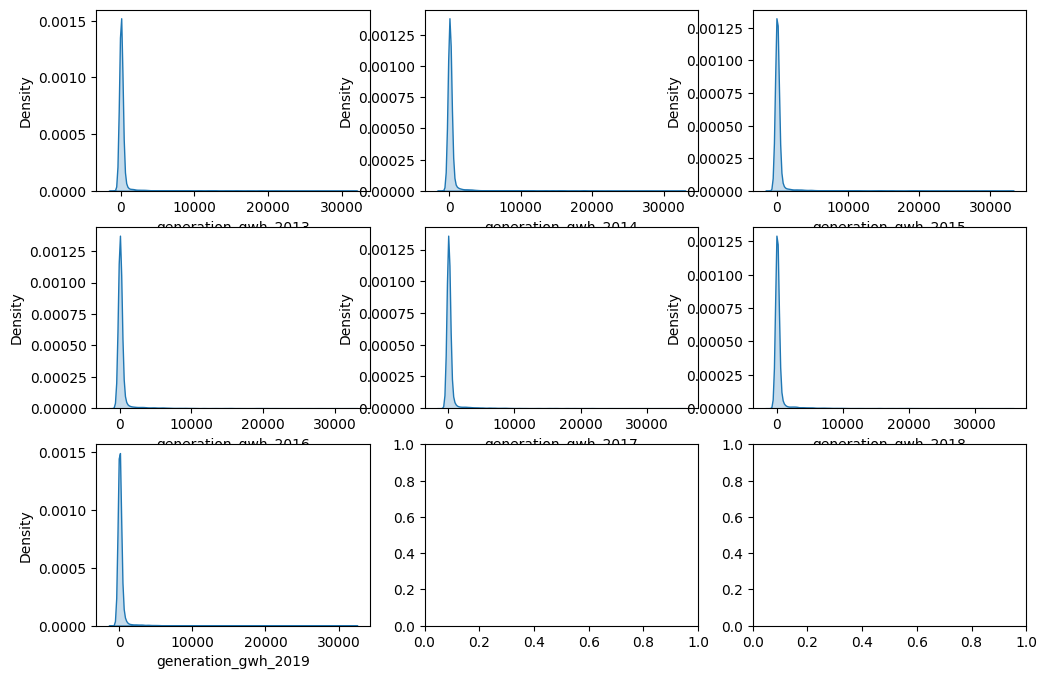

In [79]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12,8))
plotnumber = 1
for x in 'generation_gwh_2013',	'generation_gwh_2014','generation_gwh_2015',	'generation_gwh_2016'	,'generation_gwh_2017'	,'generation_gwh_2018'	,'generation_gwh_2019':
    ax = plt.subplot(3,3, plotnumber)
    sns.kdeplot(data=df, x=x, fill=True)
    plotnumber += 1


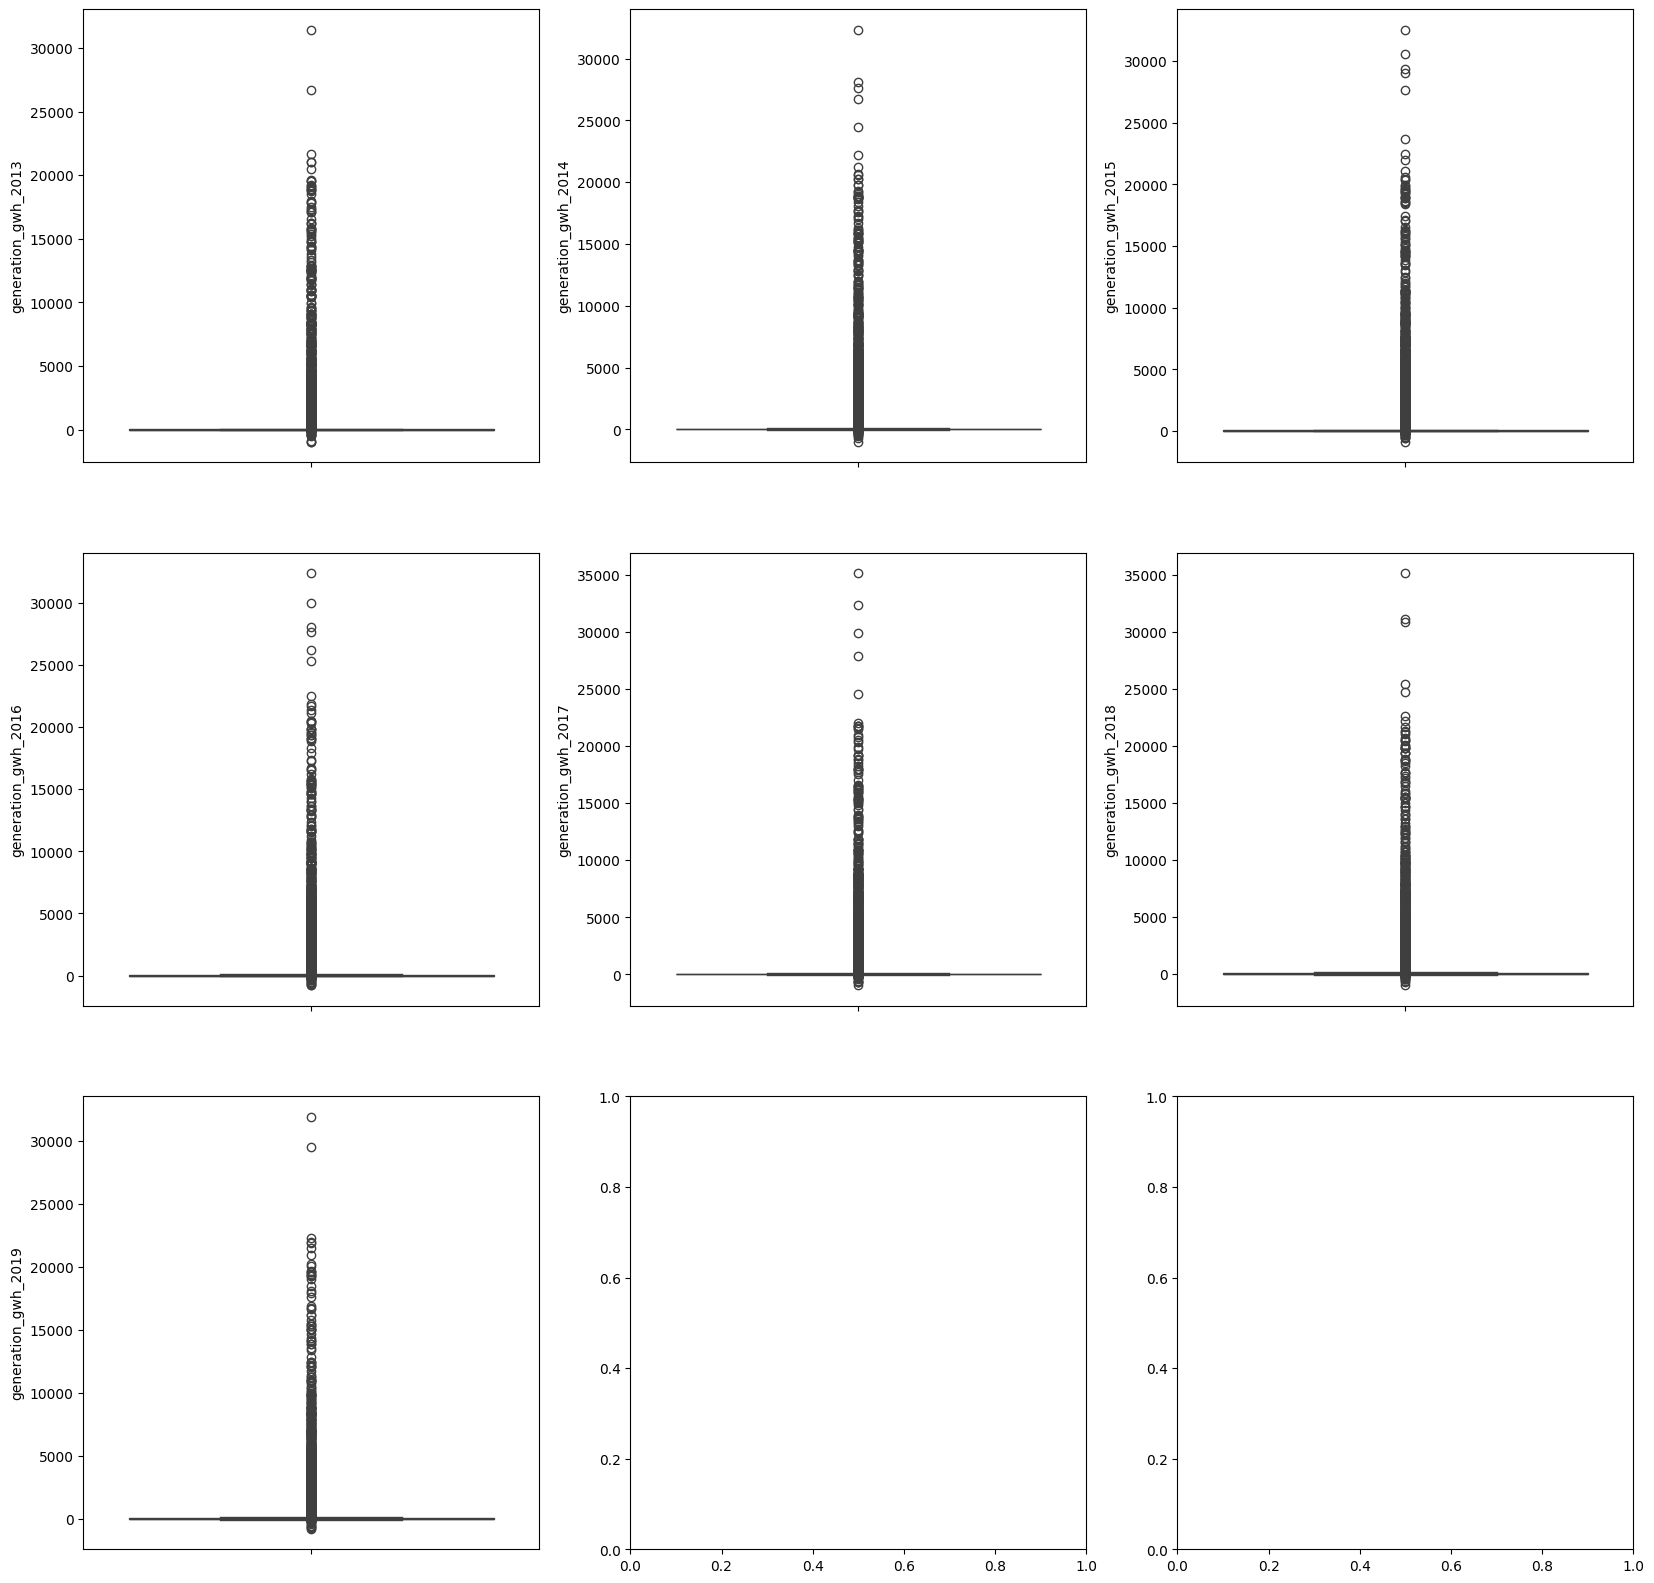

In [80]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(20,20))
plotnumber = 1
for x in 'generation_gwh_2013',	'generation_gwh_2014','generation_gwh_2015',	'generation_gwh_2016'	,'generation_gwh_2017'	,'generation_gwh_2018'	,'generation_gwh_2019':
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(data=df, y=x)
    plotnumber += 1


<p style="font-size:120%;color:red">There are outliers because it is possible some companies produce high electricity in gwh</p>

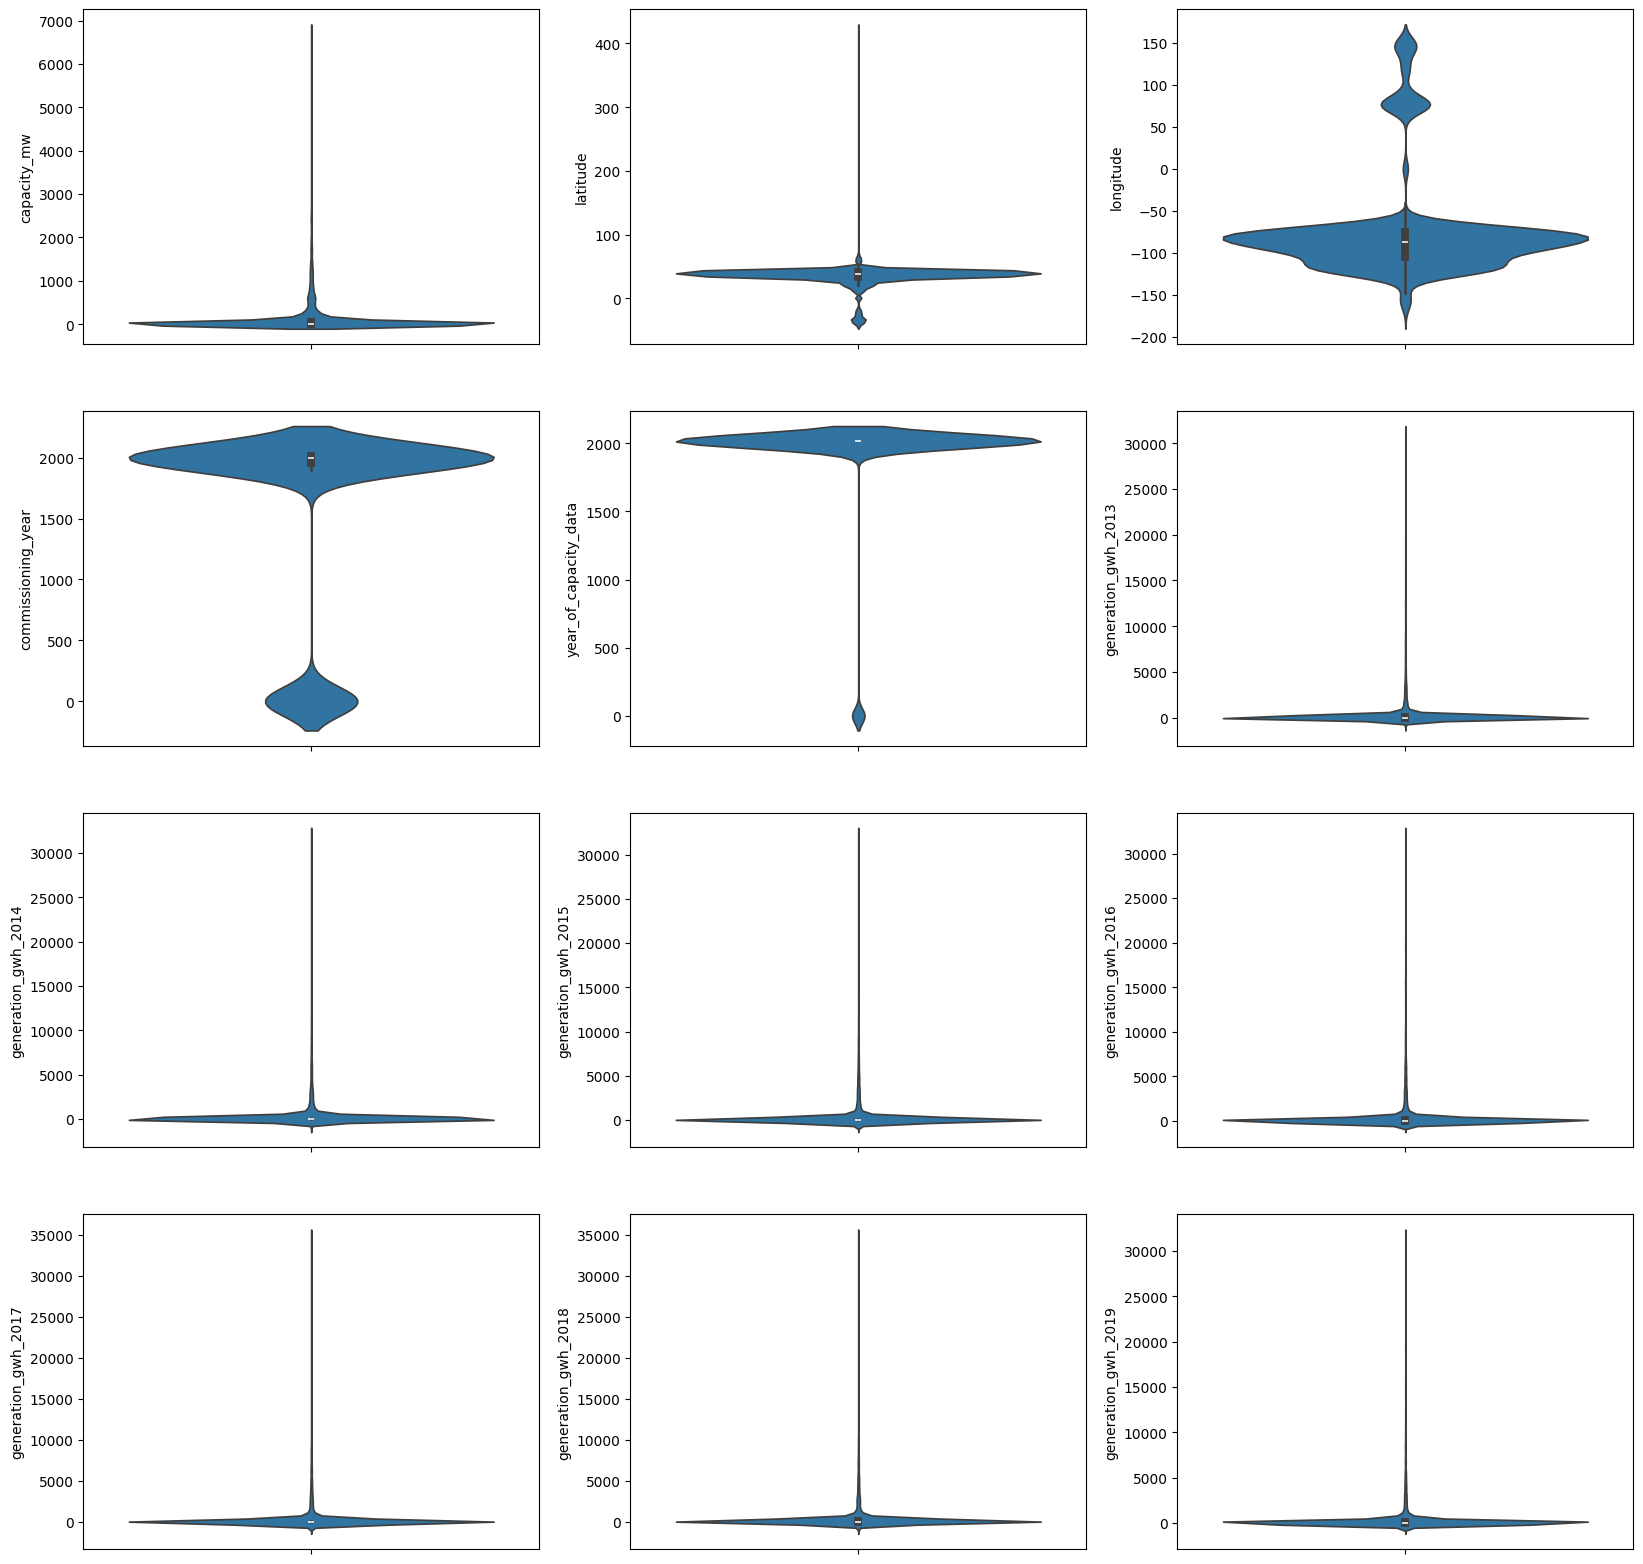

In [81]:
import warnings
warnings.filterwarnings(action='ignore')
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(20,20))
plotnumber = 1
for x in df.drop(['country_long', 'primary_fuel', 'generation_data_source'], axis=1):
    ax = plt.subplot(4,3, plotnumber)
    sns.violinplot(data=df, y=x)
    plotnumber += 1


<p style="font-size:120%;color:darkgreen">We see that the distribution in most columns is between 0 to 1000</p>

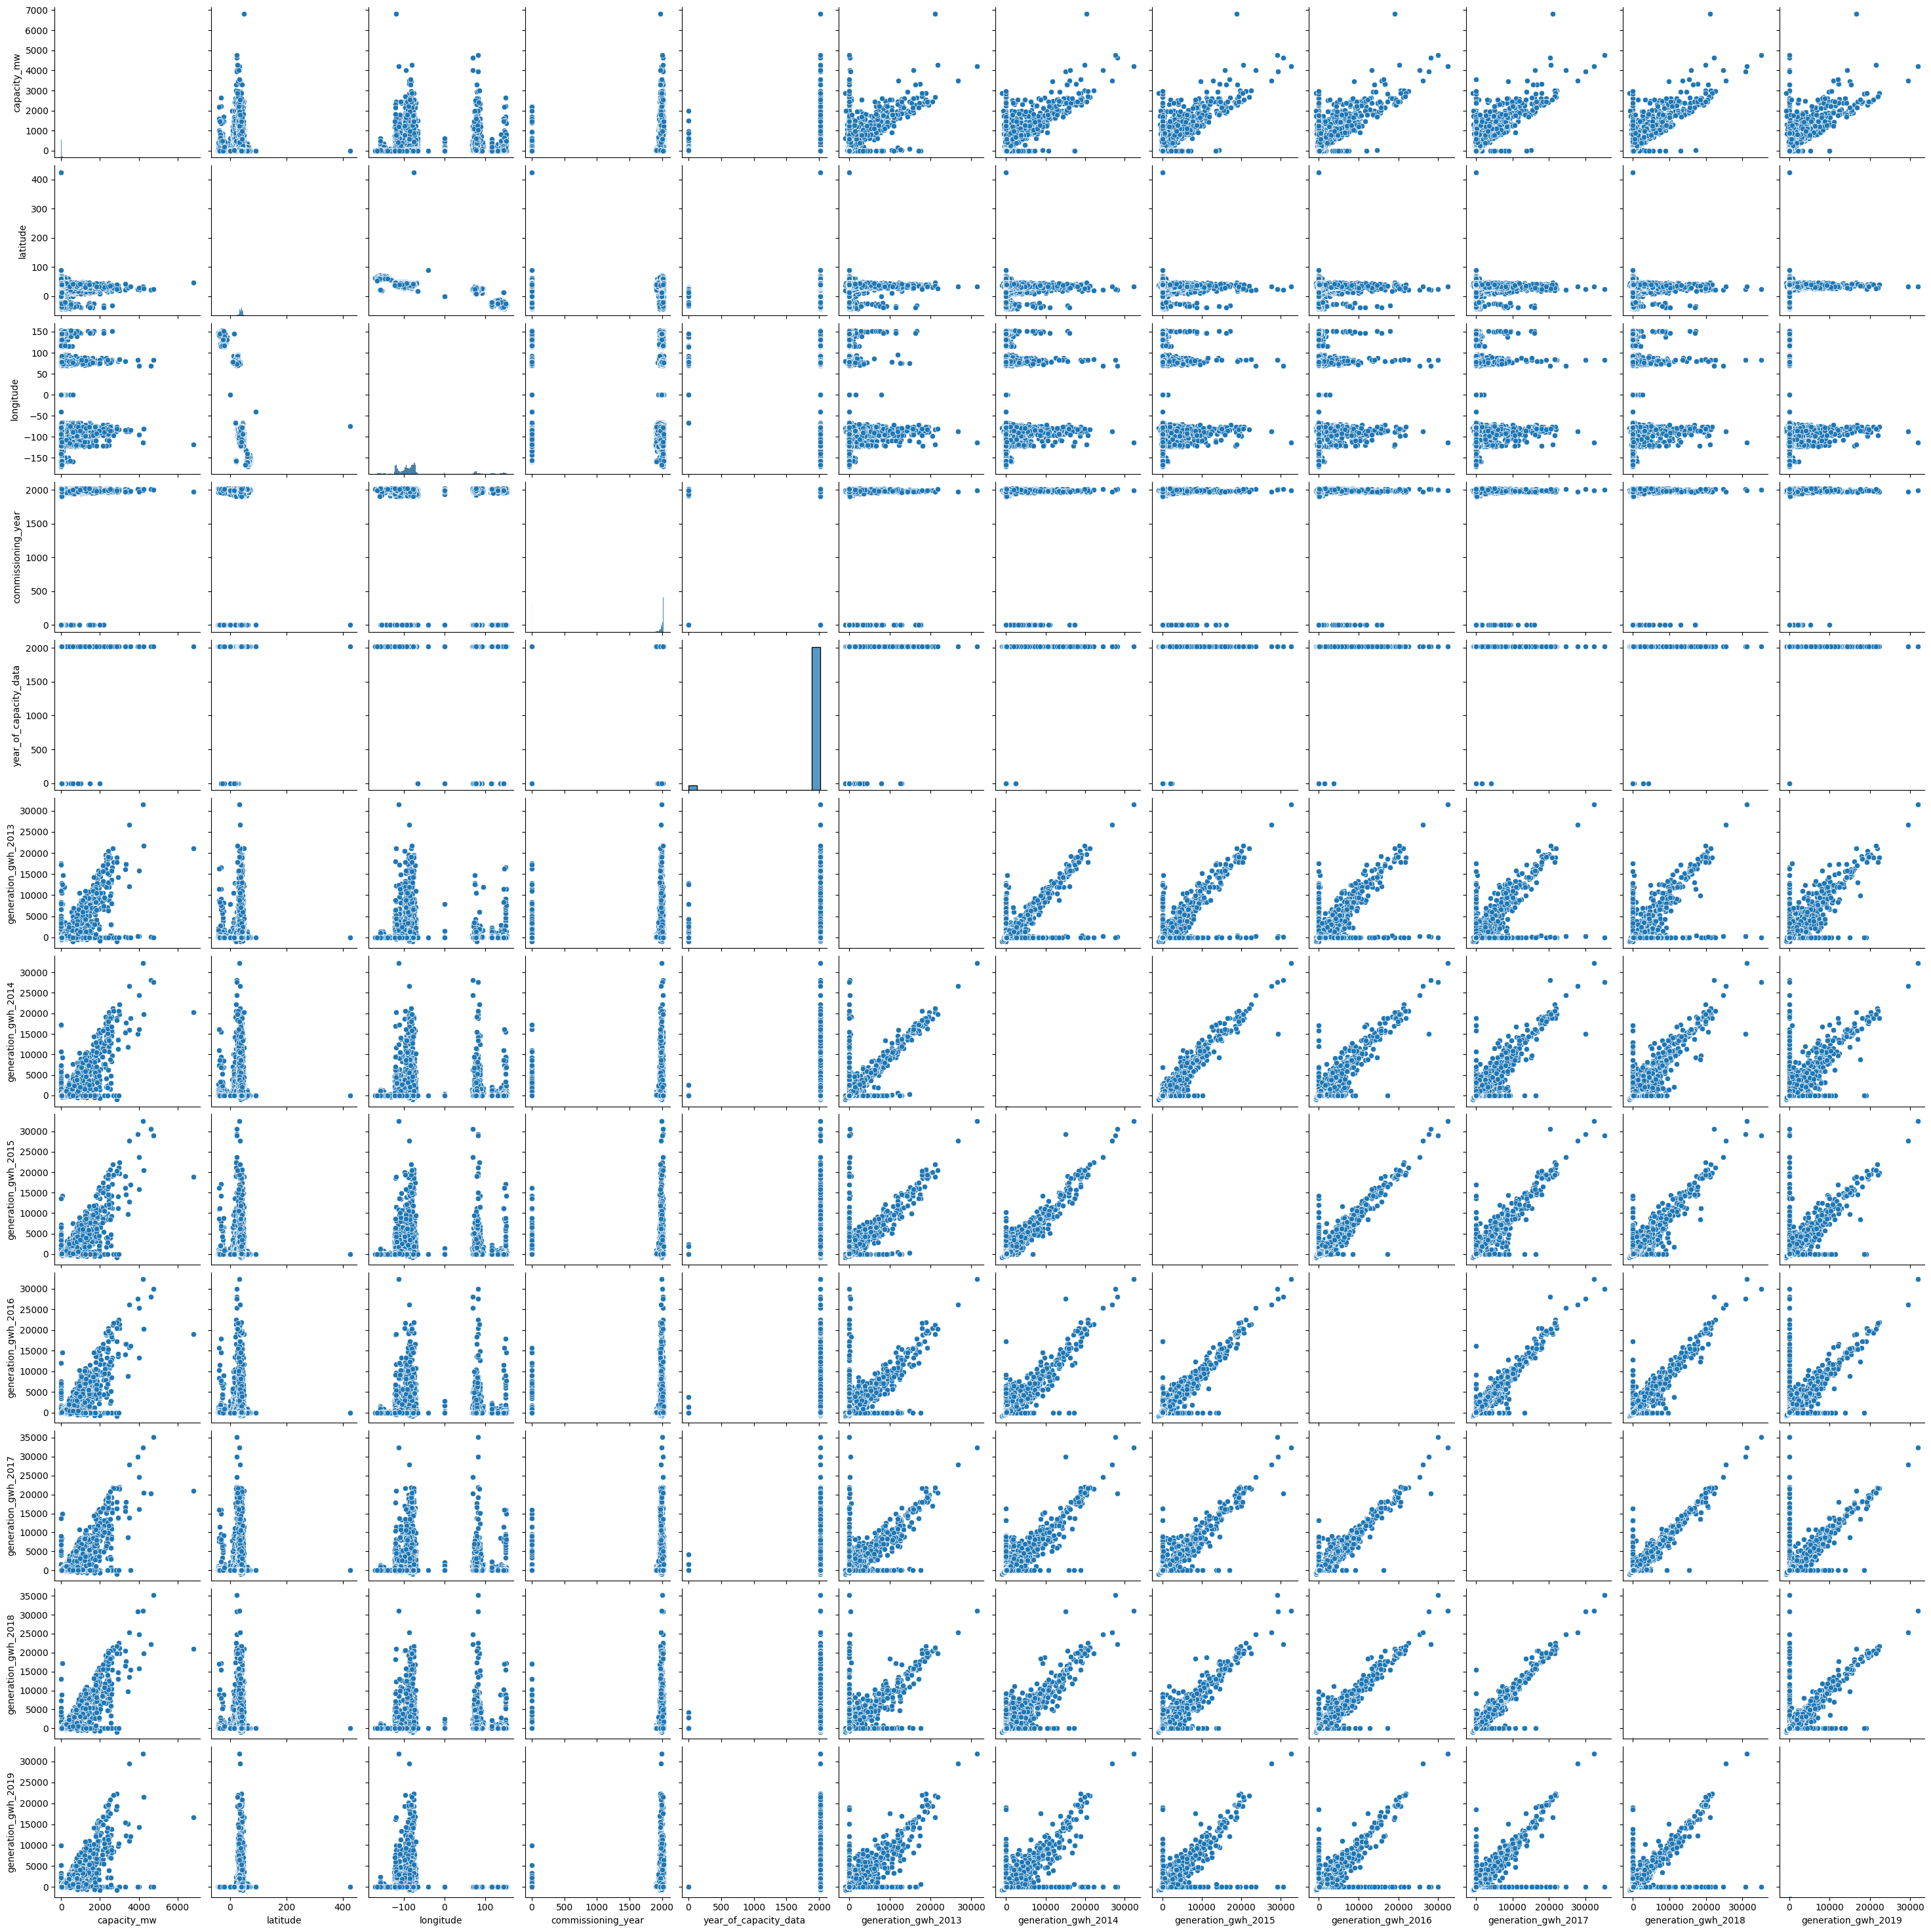

In [82]:
sns.pairplot(data=df)

In [83]:
num_df = df.drop(['country_long', 'primary_fuel', 'generation_data_source'], axis=1)
num_df

capacity_mw  latitude  longitude  commissioning_year  \
0             0.11  -34.9387   138.5377          2011.00000   
1             1.00  -34.9453   138.5882             0.00000   
2            21.60  -35.0641   117.7977             0.00000   
3             0.24  -23.7966   133.8971          2004.00000   
4             4.00  -34.5509   138.7659          2015.00000   
...            ...       ...        ...                 ...   
11874         3.40   42.8869   -76.9683          2012.00000   
11875         1.00   44.3195   -92.6703          2018.00000   
11876         0.00   44.0460   -92.7600             0.00000   
11877         0.00   39.7373  -105.0170             0.00000   
11878         9.80   40.5606  -112.0478          2013.77551   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0             0.000000             0.000000   
1                     2019.0             0.000000             0.000000   
2                     2019.0            89.595278           102.642778   
3                     2019.0             0.000000             0.000000   
4                     2019.0             0.000000             0.000000   
...                      ...                  ...                  ...   
11874                 2019.0             3.671000             2.460150   
11875                 2019.0             0.000000             0.000000   
11876                 2019.0             0.000000             0.000000   
11877                 2019.0             0.000000             0.000000   
11878                 2019.0            12.968000            51.276000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                96.555556            95.872778            85.900278   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             2.489000             1.670000             1.233490   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            71.505000            76.392000            76.631000   

       generation_gwh_2018  generation_gwh_2019  
0                 0.000000              0.00000  
1                 0.000000              0.00000  
2                92.682222              0.00000  
3                 0.000000              0.00000  
4                 0.000000              0.00000  
...                    ...                  ...  
11874             2.630000              1.21100  
11875             1.161000              1.58900  
11876             0.000000              0.00000  
11877             0.000000              0.00000  
11878            75.228000             72.06506  

[13298 rows x 12 columns]

In [84]:
num_df.corr()

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw               1.000000 -0.075889   0.124760            0.142113   
latitude                 -0.075889  1.000000  -0.776128            0.173625   
longitude                 0.124760 -0.776128   1.000000           -0.191342   
commissioning_year        0.142113  0.173625  -0.191342            1.000000   
year_of_capacity_data     0.034748  0.189815  -0.394808            0.325153   
generation_gwh_2013       0.667836 -0.021052   0.003263            0.054052   
generation_gwh_2014       0.796072 -0.047971   0.089584            0.075424   
generation_gwh_2015       0.814526 -0.050789   0.094912            0.081931   
generation_gwh_2016       0.814077 -0.054701   0.101330            0.084983   
generation_gwh_2017       0.812922 -0.056307   0.106717            0.086542   
generation_gwh_2018       0.822195 -0.056426   0.109696            0.092705   
generation_gwh_2019       0.725026  0.031275  -0.062136            0.099705   

                       year_of_capacity_data  generation_gwh_2013  \
capacity_mw                         0.034748             0.667836   
latitude                            0.189815            -0.021052   
longitude                          -0.394808             0.003263   
commissioning_year                  0.325153             0.054052   
year_of_capacity_data               1.000000             0.013556   
generation_gwh_2013                 0.013556             1.000000   
generation_gwh_2014                 0.038011             0.827336   
generation_gwh_2015                 0.039070             0.800176   
generation_gwh_2016                 0.038595             0.767331   
generation_gwh_2017                 0.038572             0.769793   
generation_gwh_2018                 0.038554             0.739657   
generation_gwh_2019                 0.039123             0.838638   

                       generation_gwh_2014  generation_gwh_2015  \
capacity_mw                       0.796072             0.814526   
latitude                         -0.047971            -0.050789   
longitude                         0.089584             0.094912   
commissioning_year                0.075424             0.081931   
year_of_capacity_data             0.038011             0.039070   
generation_gwh_2013               0.827336             0.800176   
generation_gwh_2014               1.000000             0.970013   
generation_gwh_2015               0.970013             1.000000   
generation_gwh_2016               0.937857             0.964361   
generation_gwh_2017               0.919609             0.942975   
generation_gwh_2018               0.912826             0.941770   
generation_gwh_2019               0.755997             0.765641   

                       generation_gwh_2016  generation_gwh_2017  \
capacity_mw                       0.814077             0.812922   
latitude                         -0.054701            -0.056307   
longitude                         0.101330             0.106717   
commissioning_year                0.084983             0.086542   
year_of_capacity_data             0.038595             0.038572   
generation_gwh_2013               0.767331             0.769793   
generation_gwh_2014               0.937857             0.919609   
generation_gwh_2015               0.964361             0.942975   
generation_gwh_2016               1.000000             0.969393   
generation_gwh_2017               0.969393             1.000000   
generation_gwh_2018               0.956274             0.966091   
generation_gwh_2019               0.761853             0.764748   

                       generation_gwh_2018  generation_gwh_2019  
capacity_mw                       0.822195             0.725026  
latitude                         -0.056426             0.031275  
longitude                         0.109696            -0.062136  
commissioning_year                0.092705             0.099705  
year_of_capacity_data  

<Axes: >

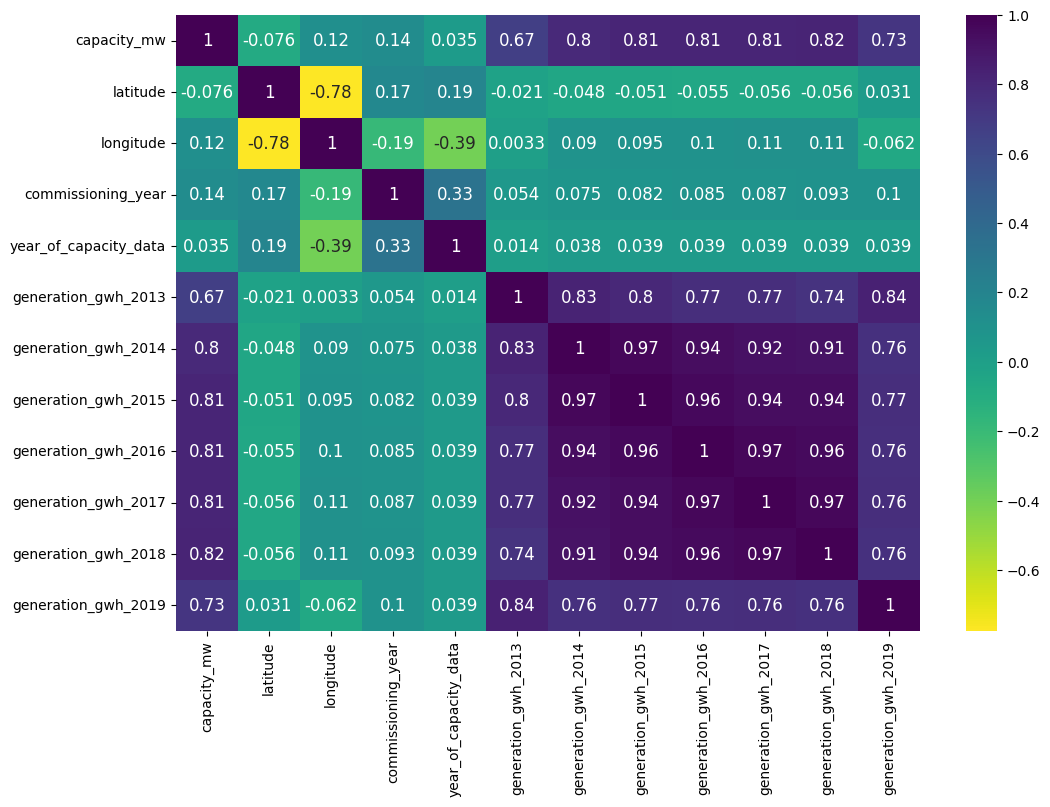

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(data=num_df.corr(), annot=True, cmap='viridis_r', annot_kws={'size':12})

<p style="font-size:120%;color:#000080">We can see that we have to predict the primary fuel and capacity in Mega Watts.The capacity mw column has a very high corelation with generation of electricity of every year column</p>

<h2>FEATURE ENGINEERING</h2>

In [86]:
original_df = df.copy()

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
enc = LabelEncoder()

In [89]:
df['primary_fuel'] = enc.fit_transform(df['primary_fuel'])
df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

       primary_fuel  commissioning_year  year_of_capacity_data  \
0                10          2011.00000                 2019.0   
1                10             0.00000                 2019.0   
2                13             0.00000                 2019.0   
3                10          2004.00000                 2019.0   
4                 7          2015.00000                 2019.0   
...             ...                 ...                    ...   
11874            13          2012.00000                 2019.0   
11875            10          2018.00000                 2019.0   
11876             8             0.00000                 2019.0   
11877             8             0.00000                 2019.0   
11878             3          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                89.595278           102.642778            96.555556   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                95.872778            85.900278            92.682222   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875             0.000000             0.000000             1.161000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            76.392000            76.631000            75.228000   

       generation_gwh_2019                  generation_data_source  
0                  0.00000                                   Other  
1                  0.00000                                   Other  
2                  0.00000        Australia Clean Energy Regulator  
3                  0.00000                                   Other  
4                  0.00000                                   Other  
...                    ...                                     ...  
11874              1.21100  U.S. Energy Information Administration  
11875              1.58900  U.S. Energy Information Administration  
11876              0.00000                    

In [90]:
df = pd.get_dummies(data=df, columns=['country_long', 'generation_data_source'], dtype=int, drop_first=True)

In [91]:
df

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0             0.11  -34.9387   138.5377            10          2011.00000   
1             1.00  -34.9453   138.5882            10             0.00000   
2            21.60  -35.0641   117.7977            13             0.00000   
3             0.24  -23.7966   133.8971            10          2004.00000   
4             4.00  -34.5509   138.7659             7          2015.00000   
...            ...       ...        ...           ...                 ...   
11874         3.40   42.8869   -76.9683            13          2012.00000   
11875         1.00   44.3195   -92.6703            10          2018.00000   
11876         0.00   44.0460   -92.7600             8             0.00000   
11877         0.00   39.7373  -105.0170             8             0.00000   
11878         9.80   40.5606  -112.0478             3          2013.77551   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0             0.000000             0.000000   
1                     2019.0             0.000000             0.000000   
2                     2019.0            89.595278           102.642778   
3                     2019.0             0.000000             0.000000   
4                     2019.0             0.000000             0.000000   
...                      ...                  ...                  ...   
11874                 2019.0             3.671000             2.460150   
11875                 2019.0             0.000000             0.000000   
11876                 2019.0             0.000000             0.000000   
11877                 2019.0             0.000000             0.000000   
11878                 2019.0            12.968000            51.276000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                96.555556            95.872778            85.900278   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             2.489000             1.670000             1.233490   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            71.505000            76.392000            76.631000   

       generation_gwh_2018  generation_gwh_2019  country_long_India  \
0                 0.000000              0.00000                   0   
1                 0.000000              0.00000                   0   
2                92.682222              0.00000                   0   
3                 0.000000              0.00000                   0   
4                 0.000000              0.00000                   0   
...                    ...                  ...                 ...   
11874             2.630000              1.21100                   0   
11875             1.161000              1.58900                   0   
11876             0.000000              0.00000                   0   
11877             0.000000              0.00000                   0   
11878            75.228000             72.06506                   0   

       country_long_United States of America  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
11874                                      1   
11875                                      1   
11876                                      

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   capacity_mw                                                    13298 non-null  float64
 1   latitude                                                       13298 non-null  float64
 2   longitude                                                      13298 non-null  float64
 3   primary_fuel                                                   13298 non-null  int64  
 4   commissioning_year                                             13298 non-null  float64
 5   year_of_capacity_data                                          13298 non-null  float64
 6   generation_gwh_2013                                            13298 non-null  float64
 7   generation_gwh_2014                                            

<h2>DATA PREPROCESSING</h2>

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [98]:
X_train.shape

(10638, 17)

In [99]:
X_test.shape

(2660, 17)

In [100]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train

capacity_mw  latitude  longitude  commissioning_year  \
0        -0.278345  0.605455  -0.230075            0.511065   
1        -0.336624 -0.016253  -0.301664           -2.013237   
2        -0.309816  0.024223  -0.066052            0.514833   
3        -0.336624  0.367145  -0.693066           -2.013237   
4        -0.324968  0.658907  -0.322821            0.521112   
...            ...       ...        ...                 ...   
10633    -0.327882  0.217141  -0.765770            0.513577   
10634    -0.332545  0.583652   0.005545            0.489715   
10635     4.180056 -0.574639   2.473489            0.501018   
10636    -0.333710 -0.077149  -0.707821            0.519856   
10637    -0.008801 -0.074057  -0.381831            0.508554   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                   0.186884            -0.161690            -0.174520   
1                   0.186884            -0.201229            -0.213427   
2                   0.186884            -0.201184            -0.212613   
3                   0.186884            -0.201229            -0.213427   
4                   0.186884            -0.201229            -0.213427   
...                      ...                  ...                  ...   
10633               0.186884            -0.196869            -0.209418   
10634               0.186884            -0.198965            -0.211225   
10635               0.186884            -0.201229             3.930599   
10636               0.186884            -0.201229            -0.213427   
10637               0.186884             0.062366             0.038741   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                -0.179995            -0.182585            -0.183995   
1                -0.218792            -0.218982            -0.220941   
2                -0.217886            -0.217999            -0.219973   
3                -0.218792            -0.218982            -0.220941   
4                -0.218792            -0.218982            -0.220941   
...                    ...                  ...                  ...   
10633            -0.214557            -0.214929            -0.217044   
10634            -0.217019            -0.216878            -0.219064   
10635             3.586888             3.601710             3.587372   
10636            -0.218792            -0.218982            -0.220941   
10637             0.005666             0.006746            -0.012678   

       generation_gwh_2018  generation_gwh_2019  country_long_India  \
0                -0.191365            -0.176853           -0.271237   
1                -0.223013            -0.213534           -0.271237   
2                -0.222255            -0.212659           -0.271237   
3                -0.223013            -0.213534           -0.271237   
4                -0.222650            -0.209763           -0.271237   
...                    ...                  ...                 ...   
10633            -0.219216            -0.209225           -0.271237   
10634            -0.220955            -0.211223           -0.271237   
10635             3.692758            -0.213534            3.686813   
10636            -0.223013            -0.208739           -0.271237   
10637            -0.031258             0.005949           -0.271237   

       country_long_United States of America  \
0                                   0.344913   
1                                   0.344913   
2                                   0.344913   
3                                   0.344913   
4                                   0.344913   
...                                      ...   
10633                               0.344913   
10634                               0.344913   
10635                              -2.899282   
10636                               0.344913   
10637                               0.344913   

       generation_data_source_Central Electricity Authority  \
0  

In [101]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test

capacity_mw  latitude  longitude  commissioning_year  \
0       -0.341108  0.096348  -0.726477            0.532143   
1        3.295668 -0.587041   2.466863            0.524679   
2        2.984781 -0.078986  -0.614125            0.496363   
3       -0.265457 -0.237478  -0.476996            0.525923   
4       -0.346078  0.001107  -0.705986            0.522191   
...           ...       ...        ...                 ...   
2655    -0.335034  0.682867  -0.221380            0.489649   
2656    -0.343041  0.236601  -0.092365            0.528411   
2657    -0.182075  0.635850  -0.271254            0.520947   
2658    -0.344973 -0.159436  -0.178051            0.530899   
2659     0.092920 -0.237466  -0.476322            0.527167   

      year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                  0.174952            -0.196347            -0.217923   
1                  0.174952            -0.181114             0.493005   
2                  0.174952             0.996665             0.716858   
3                  0.174952            -0.196347            -0.217923   
4                  0.174952            -0.194797            -0.216681   
...                     ...                  ...                  ...   
2655               0.174952            -0.196312            -0.217897   
2656               0.174952            -0.196347            -0.217923   
2657               0.174952            -0.196347            -0.217923   
2658               0.174952            -0.196347            -0.217923   
2659               0.174952            -0.196347            -0.217923   

      generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               -0.220395            -0.218544            -0.217343   
1                2.055757             3.849721             4.677676   
2                0.789257             1.238271             1.302351   
3               -0.201381            -0.184010            -0.192224   
4               -0.219191            -0.217326            -0.216321   
...                   ...                  ...                  ...   
2655            -0.220378            -0.218473            -0.217335   
2656            -0.220395            -0.218544            -0.215279   
2657            -0.220093            -0.215942            -0.217343   
2658            -0.220395            -0.218544            -0.217343   
2659            -0.220395            -0.203338             0.003703   

      generation_gwh_2018  generation_gwh_2019  country_long_India  \
0               -0.225047            -0.204638           -0.267799   
1                4.881282            -0.205747            3.734143   
2                1.407940             1.855585           -0.267799   
3               -0.199027            -0.165674           -0.267799   
4               -0.223925            -0.204322           -0.267799   
...                   ...                  ...                 ...   
2655            -0.224919            -0.205728           -0.267799   
2656            -0.224964            -0.204658           -0.267799   
2657            -0.225047            -0.205073           -0.267799   
2658            -0.225047            -0.204367           -0.267799   
2659            -0.087030             0.061415           -0.267799   

      country_long_United States of America  \
0                                  0.348449   
1                                 -2.869863   
2                                  0.348449   
3                                  0.348449   
4                                  0.348449   
...                                     ...   
2655                               0.348449   
2656                               0.348449   
2657                               0.348449   
2658                               0.348449   
2659                               0.348449   

      generation_data_source_Central Electricity Authority  \
0                                             -0.195580      
1

<h2>MODEL BUILDING FOR PREDICTING PRIMARY FUEL TYPE</h2>

In [102]:
#This model is a multiclass classification model

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression()

In [105]:
lr.fit(X_train, y_train)

LogisticRegression()

In [106]:
lr_pred = lr.predict(X_test)
lr_pred

array([10,  1,  3, ..., 10, 10,  3])

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [108]:
print(accuracy_score(y_test, lr_pred))

0.530827067669173


In [109]:
print(accuracy_score(y_test,lr_pred))
print("Training accuracy::",lr.score(X_train,y_train))
print("Test accuracy::",lr.score(X_test,y_test))
print('\n\n\n')
print(confusion_matrix(y_test,lr_pred))
print('\n\n\n')
print(classification_report(y_test,lr_pred))


0.530827067669173
Training accuracy:: 0.533934950178605
Test accuracy:: 0.530827067669173




[[  0   0   0  10   0   2   0   0   0   0  27   0   0   0]
 [  0  53   0  34   0  18   2   0   0   0   9   0   0   6]
 [  0   0   0   0   0   2   0   0   0   0   4   0   0   0]
 [  3   5   0 189   0  31   0   5   0   0 156   0   0   9]
 [  0   0   0   6   0   1   0   0   0   0   6   0   0   1]
 [  1   9   0  57   0  88   0   3   0   0 202   0   3   5]
 [  0   1   0   2   0   0   8   0   0   0   0   0   0   0]
 [  1   0   0  10   0  26   0   7   0   0 149   0   0   0]
 [  0   0   0   0   0   0   0   0 416   0   4   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   1   0   0   0]
 [  1   2   0   7   0   3   0   7   2   0 641   0   1  10]
 [  0   0   0   2   0   1   0   1   0   0  14   0   0   0]
 [  2   0   0  13   0  18   0   2   2   0  85   0   3   3]
 [  1   3   0  89   0  44   0   2   0   0 120   0   1   7]]




              precision    recall  f1-score   support

           0       0

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
logreg_score=cross_val_score(lr,X_train,y_train,cv=5,scoring='accuracy')
print(logreg_score)
print('\n')
print("cross validation score:",np.mean(logreg_score))

[0.53148496 0.52819549 0.53289474 0.52938411 0.53972732]


cross validation score: 0.5323373225023066


<p style="font-size:120%;color:purple">Our model is giving very low accuracy of 53% but our model is training very well on both training data and testing data</p>

<h3>DECISION TREE CLASSIFIER</h3>

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
dtc = DecisionTreeClassifier()

In [114]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([ 8,  1,  3, ..., 13,  8, 10])

In [116]:
print('ACCURACY SCORE : ', accuracy_score(y_test, dtc_pred))
print("Training accuracy::",dtc.score(X_train,y_train))
print("Test accuracy::",dtc.score(X_test,y_test))
print('\n\n\n')
print(confusion_matrix(y_test,dtc_pred))
print('\n\n\n')
print(classification_report(y_test,dtc_pred))


ACCURACY SCORE :  0.4105263157894737
Training accuracy:: 0.9999059973679263
Test accuracy:: 0.4105263157894737




[[  2   1   0   7   1   4   0   1  16   0   1   0   2   4]
 [  1  66   0  24   0   7   6   2   1   0   5   0   2   8]
 [  1   0   0   2   0   1   0   0   1   0   0   0   0   1]
 [ 11  18   3 199   2  24   0  11  34   1  16   1  41  37]
 [  0   0   0   2   3   0   0   1   1   0   1   0   3   3]
 [  5   8   5  30   0 145   1   2 128   0  12   0  19  13]
 [  0   3   0   0   0   0   8   0   0   0   0   0   0   0]
 [ 30   2   0  21   0  34   0  11  64   0  12   0   4  15]
 [  1   0   0   2   0   1   0   1 412   0   1   0   2   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   1   0]
 [  0   0   0 172   4   1   2   0 372   0  82   0  19  22]
 [  1   0   0   2   0   0   0   1  12   0   1   0   0   1]
 [  6   4   1  17   1  20   0   3  32   0   7   0  25  12]
 [  1   0   1  35   0  11   0   1  44   0  23   0  12 139]]




              precision    recall  f1-score   support


In [117]:
dtc_score=cross_val_score(dtc,X_train,y_train,cv=5,scoring='accuracy')
print(dtc_score)
print()
print("cross validation score for svm:",np.mean(dtc_score))

[0.77631579 0.77396617 0.77490602 0.76868829 0.76445698]

cross validation score for svm: 0.7716666489920146


<p style="font-size:120%;color:purple">Decision Tree Model is giving good accuracy</p>

<h2>RANDOM FOREST MODEL</h2>

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rfc = RandomForestClassifier()

In [120]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([8, 1, 3, ..., 3, 8, 3])

In [122]:
print('Accuracy Score : ', accuracy_score(y_test, rfc_pred))
print("Training accuracy::",rfc.score(X_train,y_train))
print("Test accuracy::",rfc.score(X_test,y_test))
print('\n\n\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,rfc_pred))
print('\n\n\n')
print('Classification Report')
print(classification_report(y_test,rfc_pred))


Accuracy Score :  0.5157894736842106
Training accuracy:: 0.9999059973679263
Test accuracy:: 0.5157894736842106




Confusion Matrix
[[  4   0   1  11   0   2   0   0  11   0   1   1   2   6]
 [  0  67   0  32   0   7   2   1   0   0   3   0   1   9]
 [  0   0   0   1   0   2   0   0   1   0   0   0   0   2]
 [  1   7   0 289   0  21   0   2  25   0   7   2  27  17]
 [  0   0   0   4   3   0   0   0   1   0   2   0   3   1]
 [  2   5   0  30   0 202   0   1 105   0   1   0  12  10]
 [  0   3   0   0   0   0   8   0   0   0   0   0   0   0]
 [  0   0   0  80   0  23   0  18  57   0   5   0   0  10]
 [  0   0   0   1   0   0   0   0 416   0   1   0   2   0]
 [  0   0   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 199   0   1   0   0 306   0 142   7   6  13]
 [  0   0   0   4   0   0   0   1  11   0   1   1   0   0]
 [  2   1   0  33   1   6   0   1  11   0   3   0  54  16]
 [  0   0   0  28   0   6   0   0  37   0  21   1   6 168]]




Classification Report
              p

In [123]:
rfc_score=cross_val_score(rfc,X_train,y_train,cv=5,scoring='accuracy')
print(rfc_score)
print()
print("cross validation score for svm:",np.mean(rfc_score))

[0.83317669 0.84069549 0.8237782  0.84626234 0.83732957]

cross validation score for svm: 0.8362484578866065


<p style="font-size:120%;color:blue">RANDOM FOREST IS GIVING SLIGHLTY IMPROVED ACCURACY</p>

<h2>SVM MODEL</h2>

In [124]:
from sklearn.svm import SVC

In [125]:
svc = SVC()

In [126]:
svc.fit(X_train, y_train)

SVC()

In [127]:
svc_pred = svc.predict(X_test)
svc_pred

array([10,  1,  3, ..., 10, 10,  3])

In [128]:
print('Accuracy Score : ', accuracy_score(y_test, svc_pred))
print("Training accuracy::",svc.score(X_train,y_train))
print("Test accuracy::",svc.score(X_test,y_test))
print('\n\n\n')
print('*'*60)
print('Confusion Matrix')
print(confusion_matrix(y_test,svc_pred))
print('\n\n\n')
print('*'*60)
print('Classification Report')
print(classification_report(y_test,svc_pred))


Accuracy Score :  0.5766917293233083
Training accuracy:: 0.5950366610265088
Test accuracy:: 0.5766917293233083




************************************************************
Confusion Matrix
[[  0   0   0   7   0   1   0   0   0   0  25   0   0   6]
 [  0  57   0  29   0  13   0   1   0   0  11   0   0  11]
 [  0   0   0   0   0   1   0   0   0   0   4   0   0   1]
 [  0   7   0 189   0  17   0   0   0   0 162   0   0  23]
 [  0   0   0   1   0   2   0   0   0   0   8   0   0   3]
 [  0   8   0  55   0 115   0   3   0   0 170   0   0  17]
 [  0   2   0   2   0   0   7   0   0   0   0   0   0   0]
 [  0   0   0  19   0   8   0  19   0   0 147   0   0   0]
 [  0   0   0   0   0   0   0   0 416   0   4   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   1   0   0   0]
 [  0   1   0  19   0   0   0   1   2   0 644   0   0   7]
 [  0   0   0   3   0   0   0   1   0   0  14   0   0   0]
 [  0   0   0  23   0  12   0   0   2   0  85   0   0   6]
 [  0   2   0  47   0  17   0   0   0   

In [129]:
svc_score=cross_val_score(svc,X_train,y_train,cv=5,scoring='accuracy')
print(svc_score)
print()
print("cross validation score for svm:",np.mean(svc_score))

[0.56860902 0.57612782 0.56296992 0.57216737 0.57357781]

cross validation score for svm: 0.5706903895846811


<h2>GRADIENT BOOSTING MODEL</h2>

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
gbc = GradientBoostingClassifier()

In [132]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [133]:
gbc_pred = gbc.predict(X_test)
gbc_pred

array([ 8,  1,  3, ...,  3,  8, 13])

In [134]:
print('Accuracy Score : ', accuracy_score(y_test, gbc_pred))
print("Training accuracy::",gbc.score(X_train,y_train))
print("Test accuracy::",gbc.score(X_test,y_test))
print('\n\n\n')
print('*'*60)
print('Confusion Matrix')
print(confusion_matrix(y_test,gbc_pred))
print('\n\n\n')
print('*'*60)
print('Classification Report')
print(classification_report(y_test,gbc_pred))


Accuracy Score :  0.46278195488721807
Training accuracy:: 0.8893589020492574
Test accuracy:: 0.46278195488721807




************************************************************
Confusion Matrix
[[  4   0   0   6   0   3   0   0  16   0   1   0   4   5]
 [  0  62   0  37   0   8   3   0   0   0   1   0   1  10]
 [  0   0   0   3   0   1   0   0   1   0   0   0   0   1]
 [  2   6   0 265   0  17   1   0  35   1  10   0  33  28]
 [  0   0   0   5   4   0   0   0   1   0   2   0   2   0]
 [  2   5   3  27   0 168   0   1 127   1   4   0  21   9]
 [  0   3   0   0   0   0   8   0   0   0   0   0   0   0]
 [  0   0   0  88   0  16   0   9  65   0   4   0   1  10]
 [  0   0   1   1   0   4   0   1 411   0   1   0   1   0]
 [  0   0   0   2   0   0   0   0   0   0   0   0   0   0]
 [  1   0   2 177   1  13   0   0 376   0  76   0   7  21]
 [  0   0   0   4   0   0   0   0  12   0   1   1   0   0]
 [  4   1   0  17   0   8   0   1  32   0   4   0  44  17]
 [  0   0   1  22   0  11   0   0  43 

In [135]:
gbc_score=cross_val_score(gbc,X_train,y_train,cv=5,scoring='accuracy')
print(gbc_score)
print()
print("cross validation score for svm:",np.mean(gbc_score))

[0.80263158 0.8218985  0.8125     0.81758345 0.81241185]

cross validation score for svm: 0.8134050747461036


<h2>KNN MODEL</h2>

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
knn = KNeighborsClassifier()

In [138]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [139]:
knn_pred = knn.predict(X_test)
knn_pred

array([ 0,  1,  3, ...,  3, 10, 10])

In [140]:
print('Accuracy Score : ', accuracy_score(y_test, knn_pred))
print("Training accuracy::",knn.score(X_train,y_train))
print("Test accuracy::",knn.score(X_test,y_test))
print('\n\n\n')
print('*'*60)
print('Confusion Matrix')
print(confusion_matrix(y_test,knn_pred))
print('\n\n\n')
print('*'*60)
print('Classification Report')
print(classification_report(y_test,knn_pred))


Accuracy Score :  0.7357142857142858
Training accuracy:: 0.825343109607069
Test accuracy:: 0.7357142857142858




************************************************************
Confusion Matrix
[[ 11   0   0   4   0   7   0   1   0   0   9   0   3   4]
 [  3  71   0  23   0   6   1   2   0   0   3   0   3  10]
 [  0   0   0   1   0   0   0   0   1   0   1   0   1   2]
 [  5  22   0 243   0  23   0  23   0   0  38   2  18  24]
 [  0   0   0   4   3   0   0   0   0   0   1   0   3   3]
 [  7  12   0  19   1 277   0  14   0   0  15   0  13  10]
 [  0   1   0   2   0   0   8   0   0   0   0   0   0   0]
 [  1   0   0  33   0  22   0  95   0   0  35   0   3   4]
 [  0   0   1   0   0   0   0   0 416   0   1   0   1   1]
 [  0   0   0   1   0   0   0   0   0   0   1   0   0   0]
 [ 12   3   0  22   0   3   0  11   2   0 606   2   4   9]
 [  0   0   0   2   0   2   0   1   0   0  11   2   0   0]
 [  6   1   1  23   1  15   0   8   2   0  26   0  40   5]
 [  2   3   0  17   0   9   0   7   0   0

In [141]:
knn_score=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
print(knn_score)
print()
print("cross validation score for svm:",np.mean(knn_score))

[0.7443609  0.7537594  0.74295113 0.75599436 0.75552421]

cross validation score for svm: 0.7505179998656727


<Axes: >

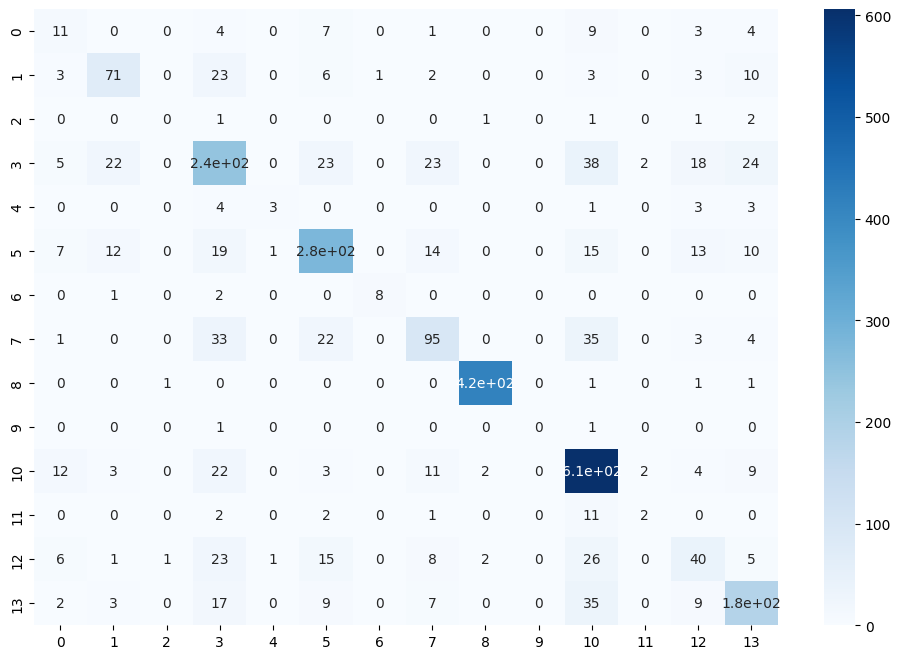

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(data=confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues')

<h3 style="color:red">We will select K Neighbours Classifier model because it is giving the highest accuracy across all the models we tried at 74% accuracy</h3>

<h2>HYPERPARAMETER TUNING</h2>

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']  
}

In [146]:
random_grid = RandomizedSearchCV(KNeighborsClassifier(),param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=4)

In [147]:
random_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=4)

In [148]:
random_grid.best_score_

0.7805041959624025

In [149]:
random_grid.best_params_

{'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}

In [150]:
knn = random_grid.best_estimator_

In [151]:
knn

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [152]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [153]:
knn_pred = knn.predict(X_test)
knn_pred

array([10,  1,  3, ...,  3, 10, 10])

In [154]:
print('Accuracy Score : ', accuracy_score(y_test, knn_pred))
print("Training accuracy::",knn.score(X_train,y_train))
print("Test accuracy::",knn.score(X_test,y_test))
print('\n\n\n')
print('*'*60)
print('Confusion Matrix')
print(confusion_matrix(y_test,knn_pred))
print('\n\n\n')
print('*'*60)
print('Classification Report')
print(classification_report(y_test,knn_pred))

Accuracy Score :  0.7537593984962406
Training accuracy:: 0.9999059973679263
Test accuracy:: 0.7537593984962406




************************************************************
Confusion Matrix
[[  8   0   0   3   0   5   0   1   0   0  14   0   2   6]
 [  3  65   0  24   0   8   3   1   0   0   2   0   3  13]
 [  0   0   0   3   0   1   0   0   0   0   0   0   0   2]
 [  4  14   0 247   0  19   0  21   0   0  41   2  19  31]
 [  0   0   0   4   5   0   0   0   0   0   1   0   2   2]
 [  2   8   0  12   0 278   0  14   0   0  19   0  19  16]
 [  0   1   0   2   0   0   8   0   0   0   0   0   0   0]
 [  1   0   0  25   0  16   0 107   0   0  36   0   0   8]
 [  0   0   0   0   0   0   0   0 416   0   2   0   1   1]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   1]
 [  5   2   0  14   0   0   0  13   2   0 624   2   4   8]
 [  0   0   0   1   0   2   0   1   0   0  12   2   0   0]
 [  6   0   0  10   1  13   0  10   2   0  29   0  51   6]
 [  2   2   0  10   0   6   0   7   0   

<Axes: >

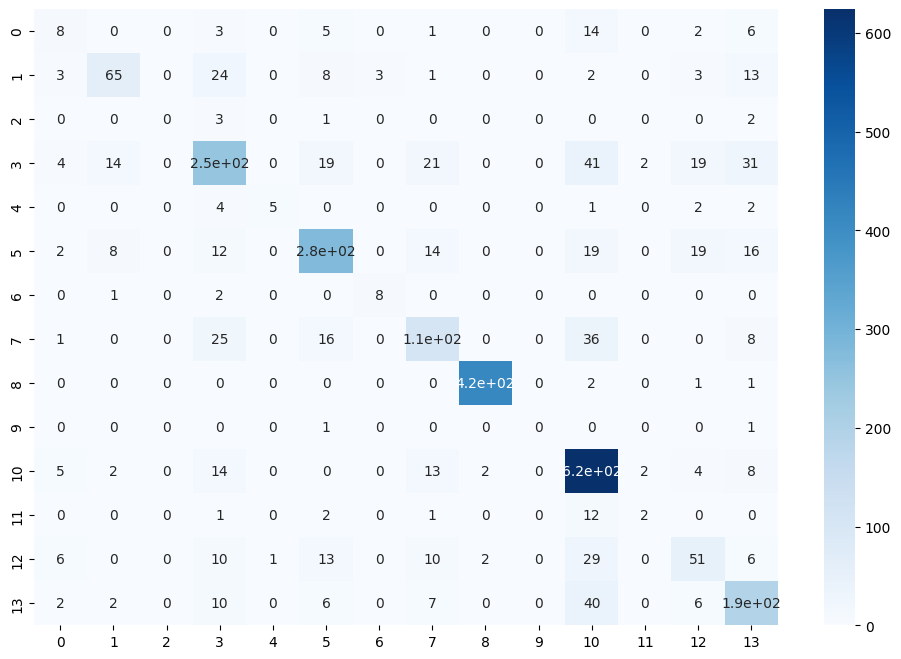

In [155]:
plt.figure(figsize=(12,8))
sns.heatmap(data=confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues')

<p style="font-size:140%;color:#FFB200">Our model accuracy has improved slightly and there is not an issue of overfitting and underfitting and our model is also giving 75% accuracy which is really good in real world data</p>

<h2>Saving the model</h2>

In [156]:
import joblib

In [157]:
joblib.dump(knn, 'Global_Power_Plant_Primary_Fuel_Prediction.pkl')

['Global_Power_Plant_Primary_Fuel_Prediction.pkl']

In [158]:
#*********************************************************************************************

<h2 style="color:red">MACHINE LEARNING MODEL TO PREDICT THE CAPACITY IN MEGAWATTS</h2>

In [159]:
original_df

country_long  capacity_mw  latitude  longitude  \
0                     Australia         0.11  -34.9387   138.5377   
1                     Australia         1.00  -34.9453   138.5882   
2                     Australia        21.60  -35.0641   117.7977   
3                     Australia         0.24  -23.7966   133.8971   
4                     Australia         4.00  -34.5509   138.7659   
...                         ...          ...       ...        ...   
11874  United States of America         3.40   42.8869   -76.9683   
11875  United States of America         1.00   44.3195   -92.6703   
11876  United States of America         0.00   44.0460   -92.7600   
11877  United States of America         0.00   39.7373  -105.0170   
11878  United States of America         9.80   40.5606  -112.0478   

      primary_fuel  commissioning_year  year_of_capacity_data  \
0            Solar          2011.00000                 2019.0   
1            Solar             0.00000                 2019.0   
2             Wind             0.00000                 2019.0   
3            Solar          2004.00000                 2019.0   
4              Oil          2015.00000                 2019.0   
...            ...                 ...                    ...   
11874         Wind          2012.00000                 2019.0   
11875        Solar          2018.00000                 2019.0   
11876        Other             0.00000                 2019.0   
11877        Other             0.00000                 2019.0   
11878          Gas          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                89.595278           102.642778            96.555556   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                95.872778            85.900278            92.682222   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875             0.000000             0.000000             1.161000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            76.392000            76.631000            75.228000   

       generation_gwh_2019                  generation_data_source  
0                  0.00000                                   Other  
1                  0.00000                                   Other  
2                  0.00000        Australia Clean Energy Regulator  
3                  0.00000                                   Other  
4                  0.00000                                   Other  
...                    ...                                     ...  
11874              1.21100  U.S. Energy Information Administration  
11875              1.58900  U.S. Energy Information Administration  
11876              0.00000                                

In [160]:
original_df.isnull().sum()

country_long              0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

<h3>FEATURE ENGINEERING</h3>

In [161]:
#We will encode the categorical columns like country_long, primary_fuel, generation data source

In [164]:
df2 = pd.get_dummies(data=original_df, columns=['country_long', 'primary_fuel', 'generation_data_source'], dtype=int, drop_first=True)
df2

capacity_mw  latitude  longitude  commissioning_year  \
0             0.11  -34.9387   138.5377          2011.00000   
1             1.00  -34.9453   138.5882             0.00000   
2            21.60  -35.0641   117.7977             0.00000   
3             0.24  -23.7966   133.8971          2004.00000   
4             4.00  -34.5509   138.7659          2015.00000   
...            ...       ...        ...                 ...   
11874         3.40   42.8869   -76.9683          2012.00000   
11875         1.00   44.3195   -92.6703          2018.00000   
11876         0.00   44.0460   -92.7600             0.00000   
11877         0.00   39.7373  -105.0170             0.00000   
11878         9.80   40.5606  -112.0478          2013.77551   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     2019.0             0.000000             0.000000   
1                     2019.0             0.000000             0.000000   
2                     2019.0            89.595278           102.642778   
3                     2019.0             0.000000             0.000000   
4                     2019.0             0.000000             0.000000   
...                      ...                  ...                  ...   
11874                 2019.0             3.671000             2.460150   
11875                 2019.0             0.000000             0.000000   
11876                 2019.0             0.000000             0.000000   
11877                 2019.0             0.000000             0.000000   
11878                 2019.0            12.968000            51.276000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  ...  \
0                 0.000000             0.000000             0.000000  ...   
1                 0.000000             0.000000             0.000000  ...   
2                96.555556            95.872778            85.900278  ...   
3                 0.000000             0.000000             0.000000  ...   
4                 0.000000             0.000000             0.000000  ...   
...                    ...                  ...                  ...  ...   
11874             2.489000             1.670000             1.233490  ...   
11875             0.000000             0.000000             0.000000  ...   
11876             0.000000             0.000000             0.000000  ...   
11877             0.000000             0.000000             0.000000  ...   
11878            71.505000            76.392000            76.631000  ...   

       primary_fuel_Oil  primary_fuel_Other  primary_fuel_Petcoke  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     1                   0                     0   
...                 ...                 ...                   ...   
11874                 0                   0                     0   
11875                 0                   0                     0   
11876                 0                   1                     0   
11877                 0                   1                     0   
11878                 0                   0                     0   

       primary_fuel_Solar  primary_fuel_Storage  primary_fuel_Waste  \
0                       1                     0                   0   
1                       1                     0                   0   
2                       0                     0                   0   
3                       1                     0                   0   
4                       0                     0                   0   
...                   ...                   ...                 ...   
11874                   0                     0                   0   
11875                   1              

In [165]:
#We will drop latitude and longitude 

In [166]:
df2.drop(['latitude', 'longitude'], axis=1, inplace=True)
df2

capacity_mw  commissioning_year  year_of_capacity_data  \
0             0.11          2011.00000                 2019.0   
1             1.00             0.00000                 2019.0   
2            21.60             0.00000                 2019.0   
3             0.24          2004.00000                 2019.0   
4             4.00          2015.00000                 2019.0   
...            ...                 ...                    ...   
11874         3.40          2012.00000                 2019.0   
11875         1.00          2018.00000                 2019.0   
11876         0.00             0.00000                 2019.0   
11877         0.00             0.00000                 2019.0   
11878         9.80          2013.77551                 2019.0   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                89.595278           102.642778            96.555556   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             3.671000             2.460150             2.489000   
11875             0.000000             0.000000             0.000000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.000000             0.000000             0.000000   
1                 0.000000             0.000000             0.000000   
2                95.872778            85.900278            92.682222   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
11874             1.670000             1.233490             2.630000   
11875             0.000000             0.000000             1.161000   
11876             0.000000             0.000000             0.000000   
11877             0.000000             0.000000             0.000000   
11878            76.392000            76.631000            75.228000   

       generation_gwh_2019  ...  primary_fuel_Oil  primary_fuel_Other  \
0                  0.00000  ...                 0                   0   
1                  0.00000  ...                 0                   0   
2                  0.00000  ...                 0                   0   
3                  0.00000  ...                 0                   0   
4                  0.00000  ...                 1                   0   
...                    ...  ...               ...                 ...   
11874              1.21100  ...                 0                   0   
11875              1.58900  ...                 0                   0   
11876              0.00000  ...                 0                   1   
11877              0.00000  ...                 0                   1   
11878             72.06506  ...                 0                   0   

       primary_fuel_Petcoke  primary_fuel_Solar  primary_fuel_Storage  \
0                         0                   1                     0   
1                         0                   1                     0   
2                         0                   0                     0   
3                         0                   1                     0   
4                         0                   0                     0   
...                     ...                 ...                   ...   
11874                     0                   0                     0   
11875                     0        

In [167]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   capacity_mw                                                    13298 non-null  float64
 1   commissioning_year                                             13298 non-null  float64
 2   year_of_capacity_data                                          13298 non-null  float64
 3   generation_gwh_2013                                            13298 non-null  float64
 4   generation_gwh_2014                                            13298 non-null  float64
 5   generation_gwh_2015                                            13298 non-null  float64
 6   generation_gwh_2016                                            13298 non-null  float64
 7   generation_gwh_2017                                            

<Axes: ylabel='Frequency'>

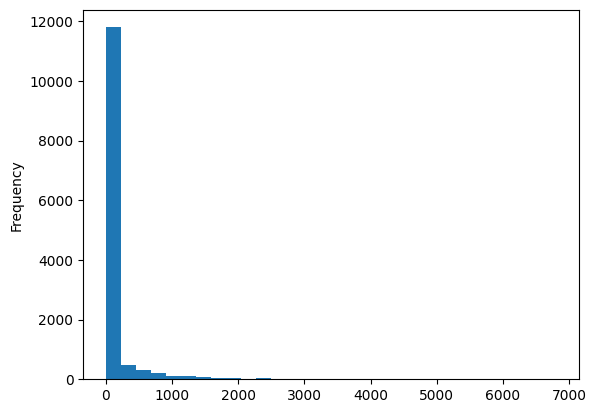

In [168]:
df2['capacity_mw'].plot.hist(bins=30)

<Axes: ylabel='Density'>

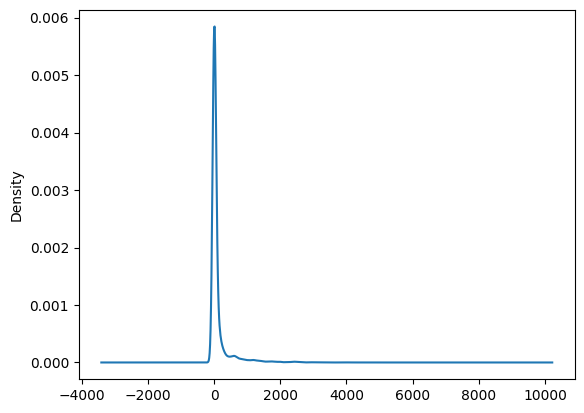

In [169]:
df2['capacity_mw'].plot.kde()

<h3>DATA PREPROCESSING</h3>

In [171]:
scaler = StandardScaler()

In [183]:
X = df2.drop('capacity_mw', axis=1)
y = df2['capacity_mw']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [185]:
X_train.shape

(10638, 27)

In [186]:
X_test.shape

(2660, 27)

In [187]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train

commissioning_year  year_of_capacity_data  generation_gwh_2013  \
0                0.511065               0.186884            -0.161690   
1               -2.013237               0.186884            -0.201229   
2                0.514833               0.186884            -0.201184   
3               -2.013237               0.186884            -0.201229   
4                0.521112               0.186884            -0.201229   
...                   ...                    ...                  ...   
10633            0.513577               0.186884            -0.196869   
10634            0.489715               0.186884            -0.198965   
10635            0.501018               0.186884            -0.201229   
10636            0.519856               0.186884            -0.201229   
10637            0.508554               0.186884             0.062366   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                -0.174520            -0.179995            -0.182585   
1                -0.213427            -0.218792            -0.218982   
2                -0.212613            -0.217886            -0.217999   
3                -0.213427            -0.218792            -0.218982   
4                -0.213427            -0.218792            -0.218982   
...                    ...                  ...                  ...   
10633            -0.209418            -0.214557            -0.214929   
10634            -0.211225            -0.217019            -0.216878   
10635             3.930599             3.586888             3.601710   
10636            -0.213427            -0.218792            -0.218982   
10637             0.038741             0.005666             0.006746   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                -0.183995            -0.191365            -0.176853   
1                -0.220941            -0.223013            -0.213534   
2                -0.219973            -0.222255            -0.212659   
3                -0.220941            -0.223013            -0.213534   
4                -0.220941            -0.222650            -0.209763   
...                    ...                  ...                  ...   
10633            -0.217044            -0.219216            -0.209225   
10634            -0.219064            -0.220955            -0.211223   
10635             3.587372             3.692758            -0.213534   
10636            -0.220941            -0.223013            -0.208739   
10637            -0.012678            -0.031258             0.005949   

       country_long_India  ...  primary_fuel_Oil  primary_fuel_Other  \
0               -0.271237  ...         -0.278947            -0.42075   
1               -0.271237  ...         -0.278947             2.37671   
2               -0.271237  ...          3.584908            -0.42075   
3               -0.271237  ...         -0.278947             2.37671   
4               -0.271237  ...         -0.278947            -0.42075   
...                   ...  ...               ...                 ...   
10633           -0.271237  ...         -0.278947            -0.42075   
10634           -0.271237  ...         -0.278947            -0.42075   
10635            3.686813  ...         -0.278947            -0.42075   
10636           -0.271237  ...         -0.278947            -0.42075   
10637           -0.271237  ...         -0.278947            -0.42075   

       primary_fuel_Petcoke  primary_fuel_Solar  primary_fuel_Storage  \
0                 -0.029099           -0.598560             -0.090278   
1                 -0.029099           -0.598560             -0.090278   
2                 -0.029099           -0.598560             -0.090278   
3                 -0.029099           -0.598560             -0.090278   
4                 -0.029099            1.670677             -0.090278   
...                     ...                 ...                   ...   
10633             -0.029

In [188]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test

commissioning_year  year_of_capacity_data  generation_gwh_2013  \
0               0.523624               0.186884            -0.201229   
1               0.516089               0.186884            -0.187010   
2               0.487502               0.186884             0.912418   
3               0.517345               0.186884            -0.201229   
4               0.513577               0.186884            -0.199782   
...                  ...                    ...                  ...   
2655            0.480723               0.186884            -0.201197   
2656            0.519856               0.186884            -0.201229   
2657            0.512321               0.186884            -0.201229   
2658            0.522368               0.186884            -0.201229   
2659            0.518601               0.186884            -0.201229   

      generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0               -0.213427            -0.218792            -0.218982   
1                0.517238             2.210901             4.109527   
2                0.747305             0.858967             1.331024   
3               -0.213427            -0.198495            -0.182239   
4               -0.212151            -0.217507            -0.217687   
...                   ...                  ...                  ...   
2655            -0.213400            -0.218774            -0.218907   
2656            -0.213427            -0.218792            -0.218982   
2657            -0.213427            -0.218469            -0.216214   
2658            -0.213427            -0.218792            -0.218982   
2659            -0.213427            -0.218792            -0.202804   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0               -0.220941            -0.223013            -0.212447   
1                5.054327             5.355408            -0.213534   
2                1.416803             1.560947             1.808489   
3               -0.193872            -0.194587            -0.174226   
4               -0.219840            -0.221787            -0.212137   
...                   ...                  ...                  ...   
2655            -0.220933            -0.222873            -0.213516   
2656            -0.218717            -0.222922            -0.212466   
2657            -0.220941            -0.223013            -0.212874   
2658            -0.220941            -0.223013            -0.212181   
2659             0.017275            -0.072236             0.048533   

      country_long_India  ...  primary_fuel_Oil  primary_fuel_Other  \
0              -0.271237  ...         -0.278947            -0.42075   
1               3.686813  ...         -0.278947            -0.42075   
2              -0.271237  ...         -0.278947            -0.42075   
3              -0.271237  ...         -0.278947            -0.42075   
4              -0.271237  ...         -0.278947            -0.42075   
...                  ...  ...               ...                 ...   
2655           -0.271237  ...          3.584908            -0.42075   
2656           -0.271237  ...         -0.278947            -0.42075   
2657           -0.271237  ...         -0.278947            -0.42075   
2658           -0.271237  ...         -0.278947            -0.42075   
2659           -0.271237  ...         -0.278947            -0.42075   

      primary_fuel_Petcoke  primary_fuel_Solar  primary_fuel_Storage  \
0                -0.029099           -0.598560             -0.090278   
1                -0.029099           -0.598560             -0.090278   
2                -0.029099           -0.598560             -0.090278   
3                -0.029099            1.670677             -0.090278   
4                -0.029099            1.670677             -0.090278   
...                    ...                 ...                   ...   
2655             -0.029099           -0.598560             -0.090278   
2656  

In [189]:
y_train

9424       20.0
6193        0.0
9551        9.2
793         0.0
11782       4.0
          ...  
4276        3.0
6587        1.4
849      1550.0
128         1.0
11732     112.5
Name: capacity_mw, Length: 10638, dtype: float64

In [190]:
y_test

10628       2.8
61       1320.0
11395    1207.4
750        30.2
5762        1.0
          ...  
11225       5.0
6511        2.1
6356       60.4
3766        1.4
8469      160.0
Name: capacity_mw, Length: 2660, dtype: float64

<h2>LINEAR REGRESSION MODEL</h2>

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
lrmodel = LinearRegression()

In [193]:
lrmodel.fit(X_train, y_train)

LinearRegression()

In [194]:
lrmodel_pred = lrmodel.predict(X_test)
lrmodel_pred

array([  10.37531971, 1201.02625392,  663.97072647, ...,  146.45427686,
          9.78631766,   55.95597139])

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [219]:
print(f'The mean absolute error is {mean_absolute_error(y_test, lrmodel_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, lrmodel_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, lrmodel_pred))}')
print()
print(f'R2 SCORE IS {r2_score(y_test, lrmodel_pred)}')
print()
print(f'Training r2 score is {lrmodel.score(X_train, y_train)}')

The mean absolute error is 64.68744284574326

The mean sqaured error is 27338.63633712545

The root mean sqaured error is 165.34399395540635

R2 SCORE IS 0.7915957633113998

Training r2 score is 0.7801530264371893


<Axes: xlabel='capacity_mw'>

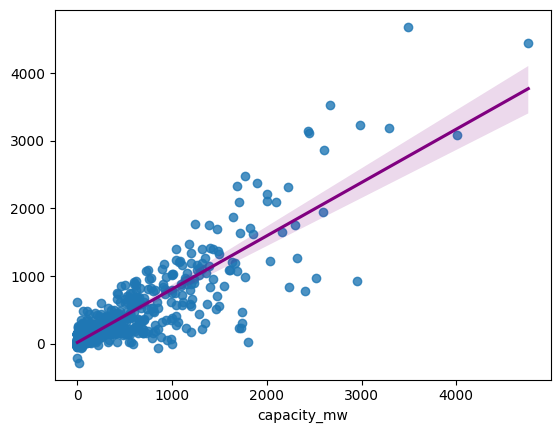

In [237]:
sns.regplot(x=y_test, y=lrmodel_pred, line_kws={'color':'purple'})

In [197]:
#We see that our model is giving good resutls as our r2 score is 0.79 and it can be considered a good model however lets try some other models

<h2>DECISION TREE REGRESSOR MODEL</h2>

In [198]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
dtr = DecisionTreeRegressor()

In [200]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [201]:
dtr_pred = dtr.predict(X_test)
dtr_pred

array([   5. , 1200. , 1200. , ...,    1.2,    2. ,  148.7])

In [220]:
print(f'The mean absolute error is {mean_absolute_error(y_test, dtr_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, dtr_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, dtr_pred))}')
print()
print(f'R2 SCORE IS {r2_score(y_test, dtr_pred)}')
print()
print(f'Training r2 score is {dtr.score(X_train, y_train)}')

The mean absolute error is 55.697503022920266

The mean sqaured error is 30053.32370237092

The root mean sqaured error is 173.35894468521352

R2 SCORE IS 0.7709015216079873

Training r2 score is 0.9988888890971668


<Axes: xlabel='capacity_mw'>

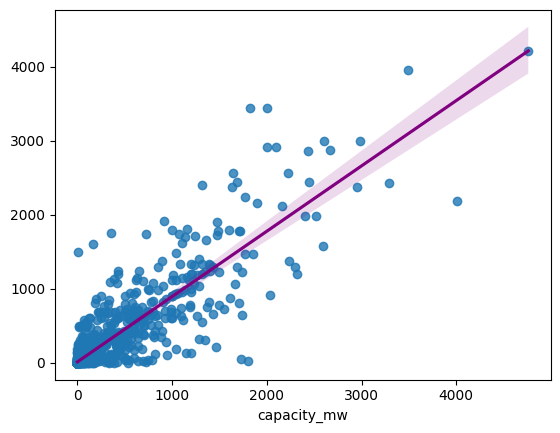

In [239]:
sns.regplot(x=y_test, y=dtr_pred, line_kws={'color':'purple'})

In [238]:
#good model

<h2>RANDOM FOREST REGRESSOR MODEL</h2>

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
rfr = RandomForestRegressor()

In [206]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [207]:
rfr_pred = rfr.predict(X_test)

In [208]:
rfr_pred

array([  23.819, 1730.066,  682.562, ...,    9.302,    1.86 ,  142.89 ])

In [221]:
print(f'The mean absolute error is {mean_absolute_error(y_test, rfr_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, rfr_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, rfr_pred))}')
print()
print(f'R2 SCORE IS {r2_score(y_test, rfr_pred)}')
print()
print(f'Training r2 score is {rfr.score(X_train, y_train)}')

The mean absolute error is 43.096508315951276

The mean sqaured error is 18903.83013950145

The root mean sqaured error is 137.49120022569244

R2 SCORE IS 0.8558948499796317

Training r2 score is 0.9784085849599802


<Axes: xlabel='capacity_mw'>

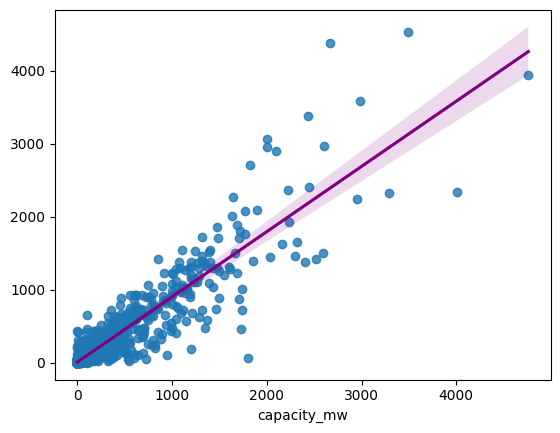

In [241]:
sns.regplot(x=y_test, y=rfr_pred, line_kws={'color':'purple'})

In [210]:
#Our model is giving very good results now

<h2>SUPPORT VECTOR MACHINE MODEL</h2>

In [211]:
from sklearn.svm import SVR

In [212]:
svr = SVR()

In [213]:
svr.fit(X_train, y_train)

SVR()

In [215]:
svr_pred = svr.predict(X_test)
svr_pred

array([  3.23068648, 144.68048204, 289.8048562 , ...,  47.02326155,
         2.95678747,  18.9332607 ])

In [216]:
print(f'The mean absolute error is {mean_absolute_error(y_test, svr_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, svr_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, svr_pred))}')
print()
print(f'R2 SCORE IS {r2_score(y_test, svr_pred)}')

The mean absolute error is 103.95633611715922

The mean sqaured error is 118031.21272894736

The root mean sqaured error is 343.5567096258598

R2 SCORE IS 0.10024024275116894


In [218]:
svr.score(X_test, y_test)

0.10024024275116894

<Axes: xlabel='capacity_mw'>

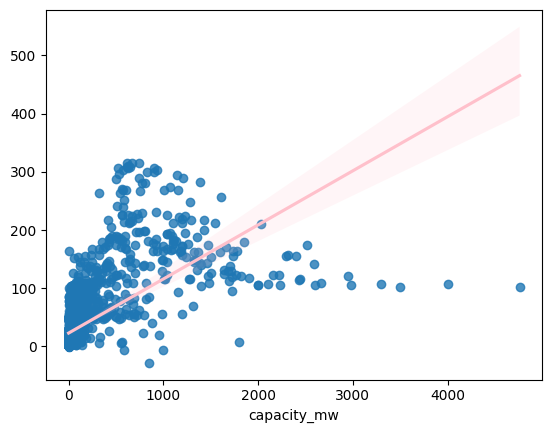

In [242]:
sns.regplot(x=y_test, y=svr_pred, line_kws={'color':'pink'})

In [222]:
#Really bad model 

<h2>K NEIGHBORS REGRESSOR</h2>

In [223]:
from sklearn.neighbors import KNeighborsRegressor

In [224]:
knn_regressor = KNeighborsRegressor()

In [225]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [226]:
knn_regressor_pred = knn_regressor.predict(X_test)
knn_regressor_pred

array([   2.28, 1860.  ,  645.62, ...,    3.84,    1.9 ,  120.84])

In [227]:
print(f'The mean absolute error is {mean_absolute_error(y_test, knn_regressor_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, knn_regressor_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, knn_regressor_pred))}')
print()
print(f'R2 SCORE IS {r2_score(y_test, knn_regressor_pred)}')
print()
print(f'Training r2 score is {knn_regressor.score(X_train, y_train)}')

The mean absolute error is 42.993765864661654

The mean sqaured error is 18806.128126135158

The root mean sqaured error is 137.13543716390436

R2 SCORE IS 0.8566396389028046

Training r2 score is 0.891637169867896


<Axes: xlabel='capacity_mw'>

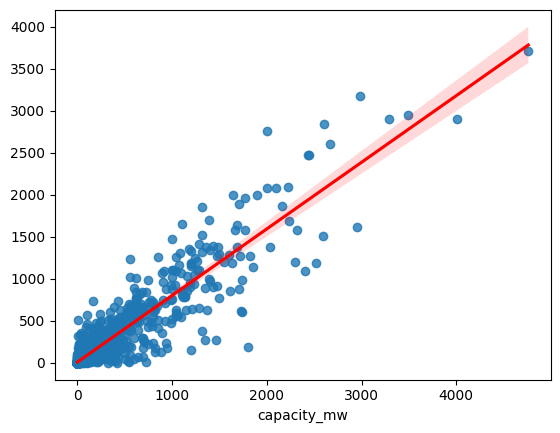

In [243]:
sns.regplot(x=y_test, y=knn_regressor_pred, line_kws={'color':'red'})

In [228]:
#Finally lets try Gradient Boosting Regressor Model

In [229]:
from sklearn.ensemble import GradientBoostingRegressor

In [230]:
gbr = GradientBoostingRegressor()

In [231]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [232]:
gbr_pred = gbr.predict(X_test)
gbr_pred

array([  12.78944574, 1616.52405707,  717.29619387, ...,   51.57902871,
          7.79301035,  118.75256413])

In [233]:
print(f'The mean absolute error is {mean_absolute_error(y_test, gbr_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, gbr_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, gbr_pred))}')
print()
print(f'R2 SCORE IS {r2_score(y_test, gbr_pred)}')
print()
print(f'Training r2 score is {gbr.score(X_train, y_train)}')

The mean absolute error is 50.339924693180954

The mean sqaured error is 20757.27819488231

The root mean sqaured error is 144.0738636772205

R2 SCORE IS 0.8417658926146634

Training r2 score is 0.9005950069695031


<Axes: xlabel='capacity_mw'>

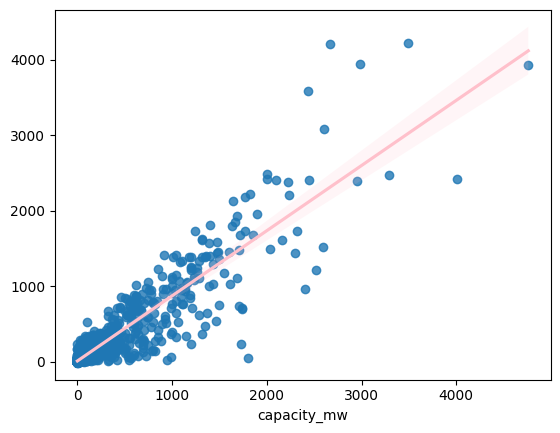

In [236]:
sns.regplot(x=y_test, y=gbr_pred, line_kws={'color':'pink'})

In [248]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def r2(model, X_train,y_train):
    r2 = cross_val_score(model, X_train,y_train, scoring='r2', cv=5)
    return(r2)


models = [LinearRegression(),
          SVR(),
          KNeighborsRegressor(),
          RandomForestRegressor(),
          DecisionTreeRegressor(),  
          GradientBoostingRegressor()]
            


names = ['LR','SVR','KNN','RFR','DTR','GBR']

for model,name in zip(models,names):
    score = r2(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.768643, 0.040555
SVR    : 0.083401, 0.013517
KNN    : 0.821893, 0.022090
RFR    : 0.840983, 0.024750
DTR    : 0.695768, 0.029545
GBR    : 0.835887, 0.020918


<p style="font-size:140%;color:maroon">We will choose KNN REGRESSOR MODEL because it gives the highest R2 SCORE and we will try to further improve the model now</p>

<h2>HYPERPARAMETER TUNING</h2>

In [258]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11,15,17], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']  
}

In [259]:
randomsearchcv = RandomizedSearchCV(knn_regressor, param_grid,scoring='r2',n_jobs=-1, cv=5, verbose=4)

In [260]:
randomsearchcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 15, 17],
                                        'weights': ['uniform', 'distance']},
                   scoring='r2', verbose=4)

In [261]:
randomsearchcv.best_score_

0.8298819605560649

In [262]:
randomsearchcv.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

In [263]:
randomsearchcv.best_estimator_

KNeighborsRegressor(metric='manhattan', weights='distance')

<p style="font-size:140%;color:#0047AB">We see that we cannot do more improvement on the model. So we will stop training our model here and save the model now through joblib</p>

<h2>SAVING THE KNN MODEL</h2>

In [265]:
joblib.dump(knn_regressor,'GLOBAL_POWER_PLANT_CAPACITY_MW_MODEL.pkl')
#Saving the KNN regressor model as it was the best model giving highest r2 score

['GLOBAL_POWER_PLANT_CAPACITY_MW_MODEL.pkl']

In [266]:
#*******************************************************************************************

<h1>DOCUMENTATION</h1>

<p style="font-size:140%;color:#967117">We trained and tested two separate models to predict primary fuel type and Capacity in MegaWatts respectively.</p>
<p style="font-size:140%;color:#967117">We first build the primary fuel type classification model and the best performing model after many experiments was K Neighbours Classifier Model which gave an respectable 75% accuracy</p>
<p style="font-size:140%;color:#967117">Then we build the Capacity in Mega Watts Prediction model which is a regression model. We found that the best performing model again was Knn model and Gradient Boosting which gave almost similar r2 score and we selected the KNN model which was just beating with a very small margin.</p>
<p style="font-size:140%;color:#967117">Then we saved both the models using joblib library into two separate pickle models.</p>
<p style="font-size:140%;color:#967117">Some metrics of both the models are given below</p>

In [2]:
from IPython.display import Image

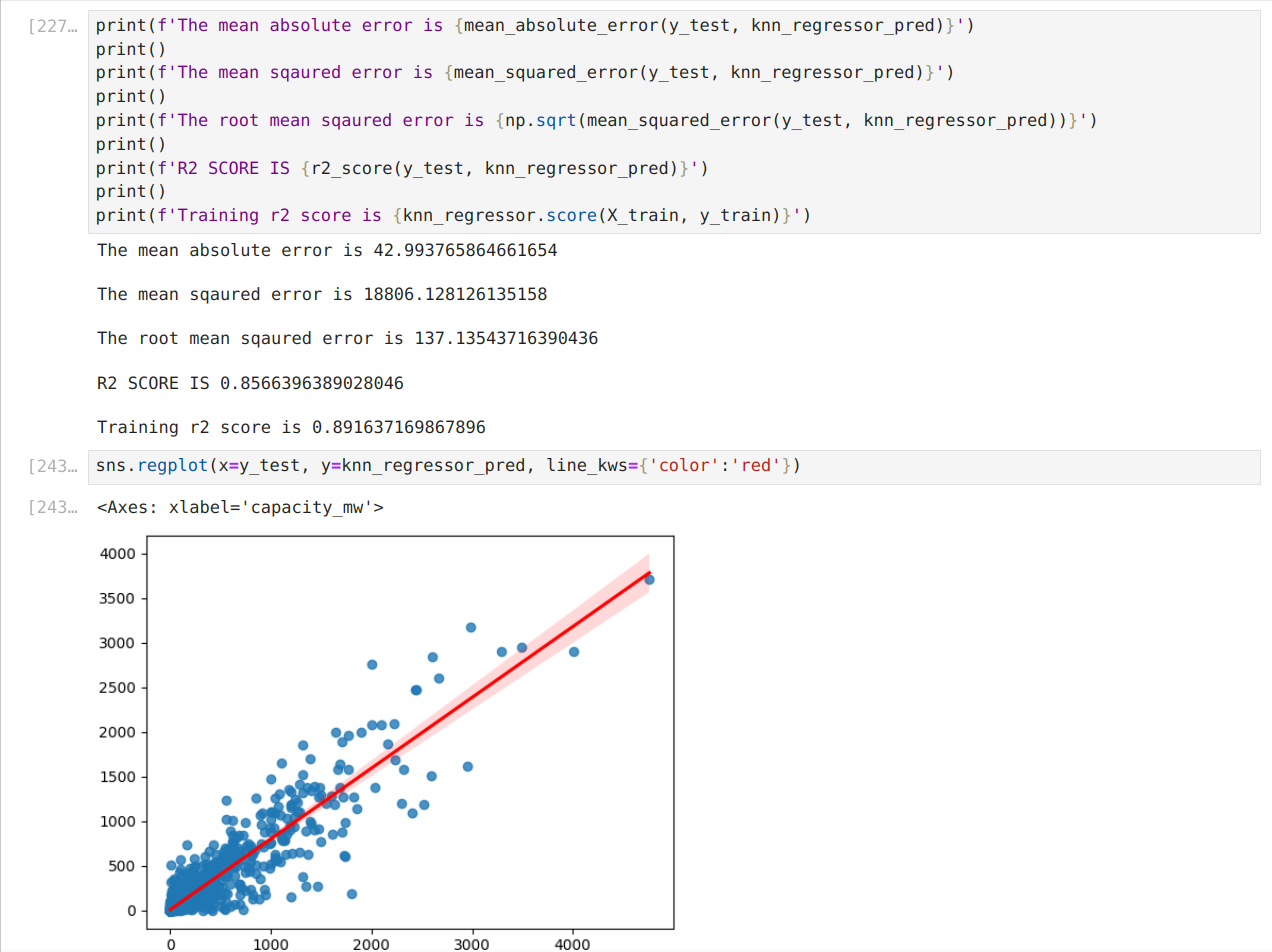

In [3]:
#First is the Capacity In megawatts prediction model metrics
Image(filename='Screenshot_20240709_145116.png')

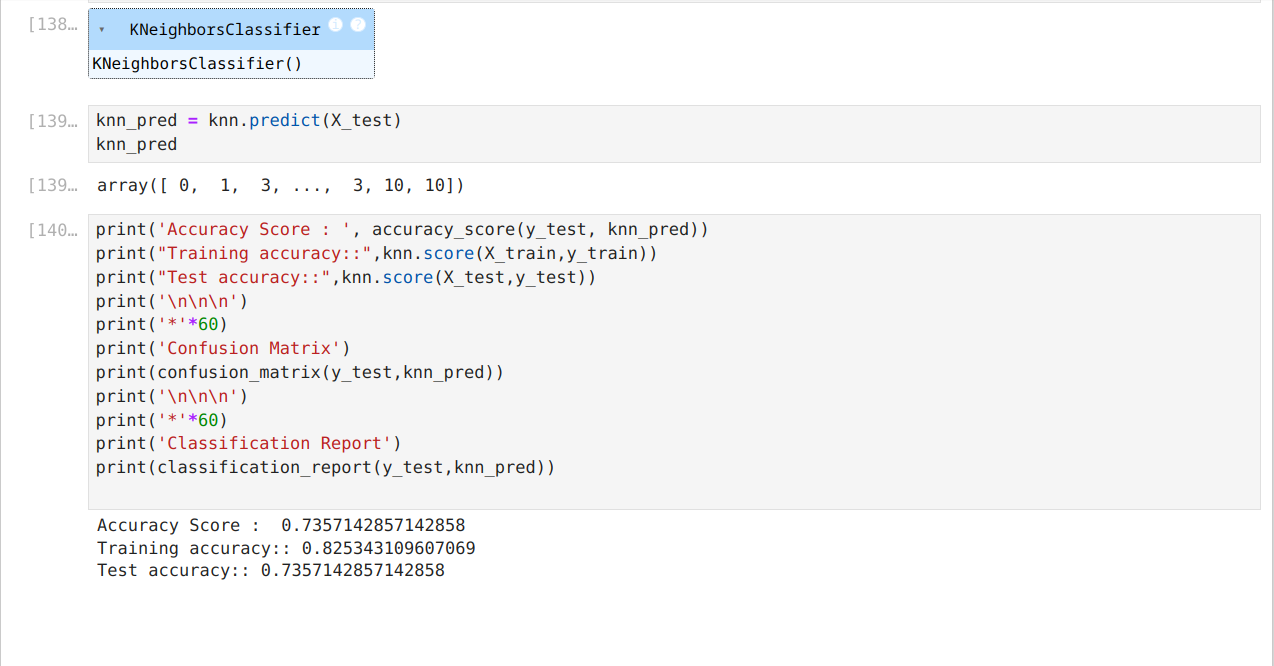

In [5]:
#Second model is for predicting the primary fuel type:
Image(filename='Screenshot_20240709_145250.png')

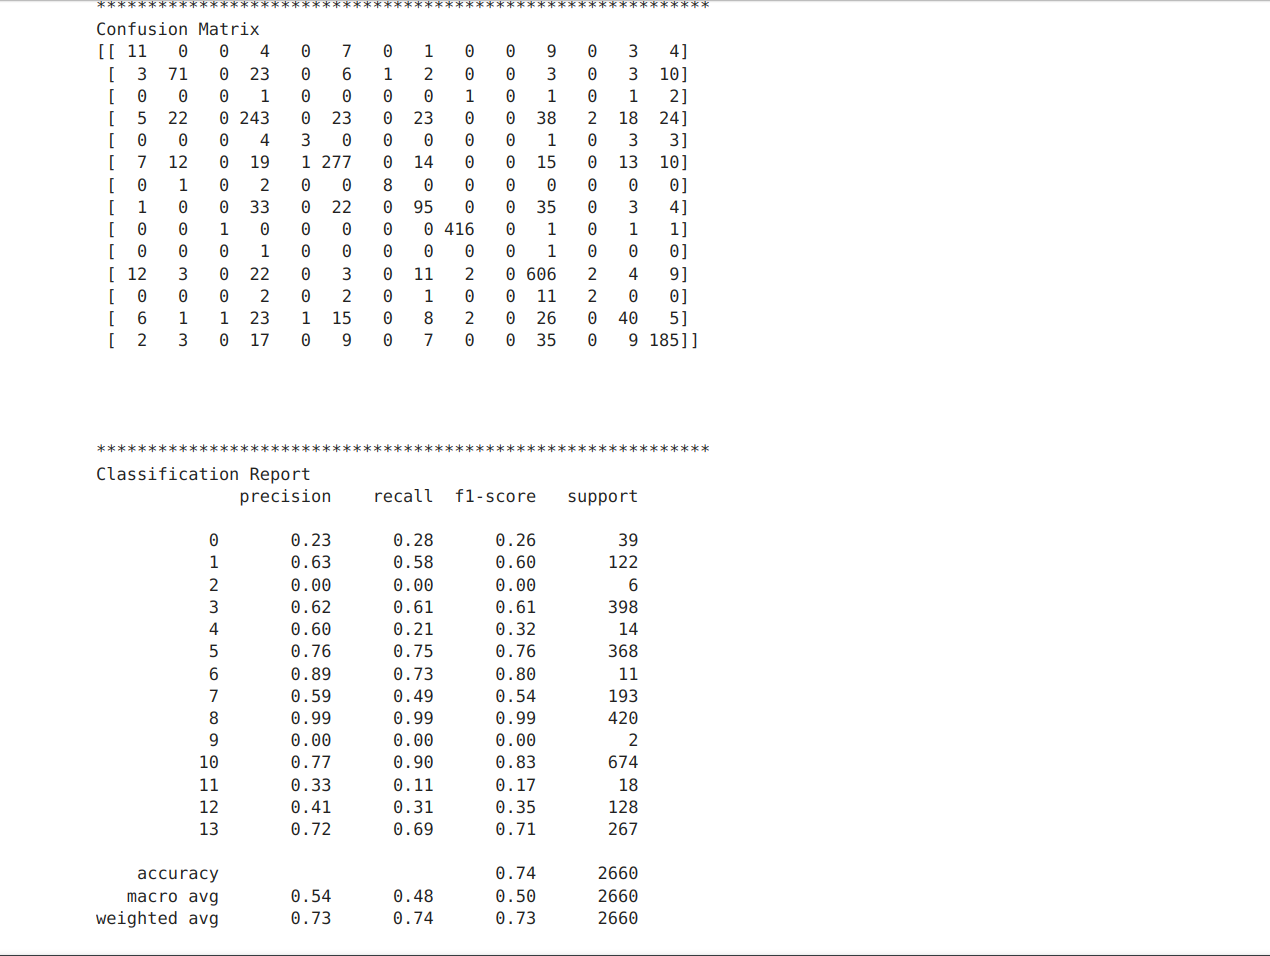

In [6]:
Image(filename='Screenshot_20240709_145338.png')

In [7]:
#Thus we have completed the model